## Working on different CSVs

In [1]:
import pandas as pd

# Paths to each CSV file

csv1 = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\inventory entry-2018.csv"
csv2 = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\inventory entry-2019.csv"
csv3 = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\inventory entry-2020.csv"
csv4 = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\inventory entry-2021.csv"
csv5 = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\inventory entry-2022.csv"
csv6 = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\inventory entry-2023.csv"
csv7 = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\inventory entry-2024.csv"


def read_csv_with_encoding(file_path):
    try:
        return pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        return pd.read_csv(file_path, encoding='latin1')  # Fallback encoding

# Read all files using the function
df1 = read_csv_with_encoding(csv1)
df2 = read_csv_with_encoding(csv2)
df3 = read_csv_with_encoding(csv3)
df4 = read_csv_with_encoding(csv4)
df5 = read_csv_with_encoding(csv5)
df6 = read_csv_with_encoding(csv6)
df7 = read_csv_with_encoding(csv7)




C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\36903330.py:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, encoding='utf-8')


## Combining the dataframes

In [2]:
# List of columns to remove
columns_to_remove = [
    "Entry Type", "Variant Code", "Variant Description",
    "Family Code", "Division", "Category", "Product Group",
    "Invoiced Quantity", "Remaining Quantity", "Retail Price TTC", "Retail Price HT"
]

# Remove the columns from each DataFrame
df1 = df1.drop(columns=columns_to_remove, errors='ignore')
df2 = df2.drop(columns=columns_to_remove, errors='ignore')
df3 = df3.drop(columns=columns_to_remove, errors='ignore')
df4 = df4.drop(columns=columns_to_remove, errors='ignore')
df5 = df5.drop(columns=columns_to_remove, errors='ignore')
df6 = df6.drop(columns=columns_to_remove, errors='ignore')
df7 = df7.drop(columns=columns_to_remove, errors='ignore')



In [3]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()
df6.info()
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134212 entries, 0 to 134211
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Posting Date        134212 non-null  object 
 1   Document No.        134212 non-null  object 
 2   Item No.            134212 non-null  object 
 3   Item Description    134197 non-null  object 
 4   Barcode             134212 non-null  object 
 5   Season              134115 non-null  object 
 6   Location Code       134212 non-null  object 
 7   Cost Center Code    134212 non-null  object 
 8   Family Name         134212 non-null  object 
 9   Division Name       134212 non-null  object 
 10  Category Name       134212 non-null  object 
 11  Product Group Name  134212 non-null  object 
 12  Gender              134212 non-null  object 
 13  Quantity            134212 non-null  int64  
 14  Cost Amount         134212 non-null  float64
 15  Sale Amount         134212 non-nul

In [4]:
# List of all DataFrames you want to combine
dataframes = [df1, df2, df3, df4, df5, df6, df7]

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

# Verify the number of rows and columns
print(f"Combined DataFrame shape: {combined_df.shape}")


  Posting Date  Document No.   Item No.           Item Description   Barcode  \
0     03-01-18  17SS27000245      77956  Long Sleeves With Buttons  2.80E+12   
1     03-01-18  17ZK27000242     J26323                     JACKET  2.80E+12   
2     03-01-18  17ZK27000242  CRF100196                TENNIS SHOE  2.80E+12   
3     03-01-18  17SS27000245     410409               Long Sleeves  2.80E+12   
4     03-01-18  17ZK27000242    4492-17                     LOAFER  2.80E+12   

  Season Location Code Cost Center Code        Family Name    Division Name  \
0  SS-16         SS027            SS027              HANRO        Nightwear   
1  AW-17         ZK027            ZK027               BOSS  Readytowear-Kid   
2  AW-17         ZK027            ZK027  RALPH LAUREN KIDS            Shoes   
3  AW-17         SS027            SS027              CANAT        Nightwear   
4  SS-17         ZK027            ZK027           OCA LOCA            Shoes   

     Category Name         Product Group Nam

## Fixing the format of the dates

In [5]:
# Convert 'Posting Date' column with the correct format explicitly
combined_df['Posting Date'] = pd.to_datetime(combined_df['Posting Date'], format='%d-%m-%y', errors='coerce')

# Format the date as Day, Month, Year
combined_df['Posting Date'] = combined_df['Posting Date'].dt.strftime('%d, %B, %Y')

# Display the updated dataframe
print(combined_df[['Posting Date']])


               Posting Date
0         03, January, 2018
1         03, January, 2018
2         03, January, 2018
3         03, January, 2018
4         03, January, 2018
...                     ...
1613628  31, December, 2024
1613629  31, December, 2024
1613630  31, December, 2024
1613631  31, December, 2024
1613632  31, December, 2024

[1613633 rows x 1 columns]


## Replacing the blanks in gender

In [6]:
import numpy as np

# Replace potential empty strings or whitespace in the 'Gender' column with NaN
combined_df['Gender'] = combined_df['Gender'].replace(['', ' '], np.nan)

# Fill empty cells in the 'Gender' column with "WOMEN" if 'Family Name' is "MOA"
combined_df.loc[
    (combined_df['Gender'].isna()) & (combined_df['Family Name'].str.strip() == 'MOA'), 
    'Gender'
] = 'WOMEN'

# Verify the changes
print(combined_df[combined_df['Family Name'].str.strip() == 'MOA'][['Family Name', 'Gender']].head())


   Family Name Gender
41         MOA  WOMEN
42         MOA  WOMEN
43         MOA  WOMEN
44         MOA  WOMEN
45         MOA  WOMEN


In [7]:
# Remove rows where the 'Gender' column is null
combined_df = combined_df.dropna(subset=['Gender'])

# Reset index after dropping rows
combined_df = combined_df.reset_index(drop=True)

# Check if nulls are removed
print(combined_df[['Gender']].isnull().sum())  # Should print 0
print(combined_df.head())  # Preview the updated dataframe


Gender    0
dtype: int64
        Posting Date  Document No.   Item No.           Item Description  \
0  03, January, 2018  17SS27000245      77956  Long Sleeves With Buttons   
1  03, January, 2018  17ZK27000242     J26323                     JACKET   
2  03, January, 2018  17ZK27000242  CRF100196                TENNIS SHOE   
3  03, January, 2018  17SS27000245     410409               Long Sleeves   
4  03, January, 2018  17ZK27000242    4492-17                     LOAFER   

    Barcode Season Location Code Cost Center Code        Family Name  \
0  2.80E+12  SS-16         SS027            SS027              HANRO   
1  2.80E+12  AW-17         ZK027            ZK027               BOSS   
2  2.80E+12  AW-17         ZK027            ZK027  RALPH LAUREN KIDS   
3  2.80E+12  AW-17         SS027            SS027              CANAT   
4  2.80E+12  SS-17         ZK027            ZK027           OCA LOCA   

     Division Name    Category Name         Product Group Name Gender  \
0        Nig

## Copying the dataframe

In [8]:
Capstone= combined_df.copy()

In [9]:

# Ensure the 'Posting Date' column is still in datetime format
Capstone['Posting Date'] = pd.to_datetime(Capstone['Posting Date'], errors='coerce')

# Reapply the desired format (Day, Month, Year)
Capstone['Posting Date'] = Capstone['Posting Date'].dt.strftime('%d, %B, %Y')

# Display the updated dataframe
print(Capstone[['Posting Date']].head())


        Posting Date
0  03, January, 2018
1  03, January, 2018
2  03, January, 2018
3  03, January, 2018
4  03, January, 2018


## Adding the rates

In [10]:
# Define file names
exchange_rate_file = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\Exchange Rates.xlsx" # File with dates and exchange rates

# Load the Capstone Data and Exchange Rate files
exchange_rates = pd.read_excel(exchange_rate_file)

# Ensure both datasets have consistent date formats
Capstone['Posting Date'] = pd.to_datetime(Capstone['Posting Date'])
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])  # Ensure correct date column name

# Merge the datasets based on the Posting Date
Capstone = pd.merge(Capstone, exchange_rates, how='left', left_on='Posting Date', right_on='Date')

# Drop the extra Date column from the exchange rate file (optional)
Capstone.drop(columns=['Date'], inplace=True)

# Apply the condition for year 2024
Capstone['Exchange Rate'] = Capstone['Exchange Rate'].fillna(
    Capstone['Posting Date'].dt.year.map(lambda x: 89500 if x == 2024 else None)
)

# Save the merged dataset to a new CSV file
output_file = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\capstone_data.csv"
Capstone.to_csv(output_file, index=False)


## Feature Engineering

In [11]:
# Add new columns
Capstone['Cost in USD'] = Capstone['Cost Amount'] / Capstone['Exchange Rate']
Capstone['Sale Amount in USD'] = Capstone['Sale Amount'] / Capstone['Exchange Rate']
Capstone['Profit'] = Capstone['Sale Amount in USD'] + Capstone['Cost in USD']

In [12]:
# Save the merged dataset to a new CSV file
output_file = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\capstone_data.csv"
Capstone.to_csv(output_file, index=False)

In [13]:
Capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604313 entries, 0 to 1604312
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Posting Date        1604313 non-null  datetime64[ns]
 1   Document No.        1604313 non-null  object        
 2   Item No.            1604313 non-null  object        
 3   Item Description    1603747 non-null  object        
 4   Barcode             1603227 non-null  object        
 5   Season              1599529 non-null  object        
 6   Location Code       1604313 non-null  object        
 7   Cost Center Code    1604313 non-null  object        
 8   Family Name         1604312 non-null  object        
 9   Division Name       1604313 non-null  object        
 10  Category Name       1604313 non-null  object        
 11  Product Group Name  1604309 non-null  object        
 12  Gender              1604313 non-null  object        
 13  Quantity    

## Adding Labels for the dates

In [14]:
Clean=pd.read_csv(r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\capstone_data.csv")

C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\1751582173.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Clean=pd.read_csv(r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\capstone_data.csv")


In [15]:
# Ensure the Posting Date column is in datetime format
Clean['Posting Date'] = pd.to_datetime(Clean['Posting Date'], errors='coerce')

# Define the crisis timeframes
crisis_periods = [
    (pd.Timestamp("2020-03-15"), pd.Timestamp("2021-06-30"), "COVID-19 Lockdown"),  # Lockdowns
    (pd.Timestamp("2020-08-04"), pd.Timestamp("2021-03-31"), "Beirut Explosion Aftermath"),  # Beirut Explosion impact
    (pd.Timestamp("2023-10-08"), pd.Timestamp("2024-12-31"), "Israel-Lebanon War")  # Recent conflict
]

# Function to assign normal or crisis periods
def categorize_period(date):
    if pd.isna(date):
        return "Unknown"  # Handle missing dates
    for start, end, label in crisis_periods:
        if start <= date <= end:
            return label
    return "Normal"

# Apply the function to create a new column
Clean['Period Type'] = Clean['Posting Date'].apply(categorize_period)

# Display the first few rows to verify
print(Clean[['Posting Date', 'Period Type']].head())


  Posting Date Period Type
0   2018-01-03      Normal
1   2018-01-03      Normal
2   2018-01-03      Normal
3   2018-01-03      Normal
4   2018-01-03      Normal


In [16]:
Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604313 entries, 0 to 1604312
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Posting Date        1604313 non-null  datetime64[ns]
 1   Document No.        1604313 non-null  object        
 2   Item No.            1604313 non-null  object        
 3   Item Description    1603747 non-null  object        
 4   Barcode             1603227 non-null  object        
 5   Season              1599529 non-null  object        
 6   Location Code       1604313 non-null  object        
 7   Cost Center Code    1604313 non-null  object        
 8   Family Name         1604312 non-null  object        
 9   Division Name       1604313 non-null  object        
 10  Category Name       1604313 non-null  object        
 11  Product Group Name  1604309 non-null  object        
 12  Gender              1604313 non-null  object        
 13  Quantity    

## Mapping the categories

In [17]:
# Define the updated full category mapping dictionary
category_mapping = {
    # Bags & Luggage
    'BACKPACKS': 'Bags & Luggage',
    'BAG': 'Bags & Luggage',
    'BAGS': 'Bags & Luggage',
    '30-BAGS': 'Bags & Luggage',
    '32-Small Leather Goods': 'Bags & Luggage',
    '43-Shoes': 'Bags & Luggage',
    'SMALL LEATHER GOODS': 'Bags & Luggage',
    'MAROQUINERIE': 'Bags & Luggage',
    'Sachet': 'Bags & Luggage',
    'LUGGAGE': 'Bags & Luggage',  # Added
    
    # Clothing & Apparel
    'Bikini': 'Clothing & Apparel',
    'BONNETERIE': 'Clothing & Apparel',
    'Nightwear': 'Clothing & Apparel',
    'Readytowear': 'Clothing & Apparel',
    'Readytowear-Baby': 'Clothing & Apparel',
    'Readytowear-Kid': 'Clothing & Apparel',
    'Ready To Wear': 'Clothing & Apparel',
    'Ready to wear': 'Clothing & Apparel',
    'One Piece.': 'Clothing & Apparel',
    'Cover Up': 'Clothing & Apparel',
    'Swimwear': 'Clothing & Apparel',
    'Lingerie': 'Clothing & Apparel',
    'Underwear': 'Clothing & Apparel',
    'Underwear-Baby': 'Clothing & Apparel',
    'Underwear-Kids': 'Clothing & Apparel',
    'Shirts': 'Clothing & Apparel',
    'Trousers': 'Clothing & Apparel',
    'Loungwear': 'Clothing & Apparel',
    'Loungewear': 'Clothing & Apparel',
    'Lounge': 'Clothing & Apparel',
    'Clothing': 'Clothing & Apparel',  # Added
    'Sleepwear-Baby': 'Clothing & Apparel',  # Added
    'Sleepwear-Kids': 'Clothing & Apparel',  # Added
    
    # Footwear
    '40-Shoes': 'Footwear',
    'Shoes': 'Footwear',
    'CHAUSSURES': 'Footwear',
    'CHAUSSANT': 'Footwear',
    'Footwear': 'Footwear',
    
    # Accessories
    '0M-Accessoies': 'Accessories',
    'Accessories': 'Accessories',
    'Accessoires': 'Accessories',
    'ARTICLE CHEVEUX': 'Accessories',
    'LUNETTES-': 'Accessories',
    'HATS': 'Accessories',
    'CEINTURES': 'Accessories',
    'BIJOUX FANTAISIE': 'Accessories',
    'Professional Accessories': 'Accessories',
    'ACCESSORIES': 'Accessories',  # Added
    
    # Beauty & Personal Care
    'FACE CARE': 'Beauty & Personal Care',
    'Facial Care': 'Beauty & Personal Care',
    'BODY CARE': 'Beauty & Personal Care',
    'BODY & SHOWER': 'Beauty & Personal Care',
    'HAIR CARE': 'Beauty & Personal Care',
    'Hair Care': 'Beauty & Personal Care',
    'Haircare': 'Beauty & Personal Care',
    'Skincare': 'Beauty & Personal Care',
    'SKINCARE': 'Beauty & Personal Care',  # Added
    'Sun Care': 'Beauty & Personal Care',
    'Makeup': 'Beauty & Personal Care',
    'Cosmetique Bio': 'Beauty & Personal Care',
    'Hand&Body Care': 'Beauty & Personal Care',
    'Personal Care': 'Beauty & Personal Care',
    'Bath': 'Beauty & Personal Care',
    'Bath & Body': 'Beauty & Personal Care',
    'Hygiene': 'Beauty & Personal Care',
    'Body': 'Beauty & Personal Care',
    'BODY PERFUME': 'Beauty & Personal Care',
    'Beauty Product': 'Beauty & Personal Care',
    'Face Care': 'Beauty & Personal Care',  # Added
    
    # Fragrance
    'Fragrance': 'Fragrance',
    'PERFUME': 'Fragrance',
    'FRAGRANCE': 'Fragrance',
    'Spray': 'Fragrance',
    
    # Home & Decor
    'Soap': 'Home & Decor',
    'TOILETRIES': 'Home & Decor',
    'Candle': 'Home & Decor',
    'Diffuser': 'Home & Decor',
    'Home Accessories': 'Home & Decor',
    'HOME': 'Home & Decor',
    'GALLERY': 'Home & Decor',
    
    # Gifts & Sets
    'SET': 'Gifts & Sets',
    'Gift Box': 'Gifts & Sets',
    'Gift Cards': 'Gifts & Sets',
    'Gift Ideas': 'Gifts & Sets',
    'Gift Set': 'Gifts & Sets',
    'KITS': 'Gifts & Sets',
    'COFFRETS': 'Gifts & Sets',
    'Welcome Collection': 'Gifts & Sets',
    'Christening': 'Gifts & Sets',  # Added
    
    # Other / Miscellaneous
    'DIVERS': 'Other / Miscellaneous',
    'Complements': 'Other / Miscellaneous',
    'SERVICE': 'Other / Miscellaneous',
    'SERVICE MATERIAL': 'Other / Miscellaneous',
    'OTHERS': 'Other / Miscellaneous',
    'Divers': 'Other / Miscellaneous',
    'Generic POS': 'Other / Miscellaneous',
    'Mat. Fonction. Cb': 'Other / Miscellaneous',
    'Professional Products': 'Other / Miscellaneous',
    'Professional Use Care': 'Other / Miscellaneous',
    'Retail Products': 'Other / Miscellaneous',
    'Testers': 'Other / Miscellaneous',
    'Hotel Supplies': 'Other / Miscellaneous',
    'New Born': 'Other / Miscellaneous',
    'Other': 'Other / Miscellaneous'  # Added
}

# Apply the mapping to the dataset
Clean['Category'] = Clean['Division Name'].map(category_mapping)

# Check for unmapped categories
unmapped_categories = Clean[Clean['Category'].isnull()]['Division Name'].unique()
if len(unmapped_categories) > 0:
    print("Unmapped Categories Detected:")
    print(unmapped_categories)
else:
    print("All categories mapped successfully!")

# Display a preview of the updated DataFrame
print(Clean[['Division Name', 'Category']].head())


All categories mapped successfully!
     Division Name            Category
0        Nightwear  Clothing & Apparel
1  Readytowear-Kid  Clothing & Apparel
2            Shoes            Footwear
3        Nightwear  Clothing & Apparel
4            Shoes            Footwear


## Making sure the month is read correctly

In [18]:
# Ensure the 'Date' column is in datetime format
Clean['Posting Date'] = pd.to_datetime(Clean['Posting Date'], errors='coerce')

# Extract the month and create a new column 'Month'
Clean['Month'] = Clean['Posting Date'].dt.month

# Display the dataframe with the new 'Month' column
print(Clean[['Posting Date', 'Month']])


        Posting Date  Month
0         2018-01-03      1
1         2018-01-03      1
2         2018-01-03      1
3         2018-01-03      1
4         2018-01-03      1
...              ...    ...
1604308   2024-12-31     12
1604309   2024-12-31     12
1604310   2024-12-31     12
1604311   2024-12-31     12
1604312   2024-12-31     12

[1604313 rows x 2 columns]


## Filling the empty cells with the respective feature engineering

In [19]:
# Fill missing Exchange Rate with 1 (assuming default exchange rate of 1 if missing)
Clean['Exchange Rate'] = Clean['Exchange Rate'].fillna(1)

# Recalculate missing Cost in USD as Original Cost divided by Exchange Rate
Clean['Cost in USD'] = Clean.apply(
    lambda row: row['Cost Amount'] / row['Exchange Rate'] if pd.isna(row['Cost in USD']) else row['Cost in USD'],
    axis=1
)

# Fill missing Sale Amount in USD as Original Sale Amount divided by Exchange Rate
Clean['Sale Amount in USD'] = Clean.apply(
    lambda row: row['Sale Amount'] / row['Exchange Rate'] if pd.isna(row['Sale Amount in USD']) else row['Sale Amount in USD'],
    axis=1
)

# Recalculate Profit if missing
Clean['Profit'] = Clean['Profit'].fillna(Clean['Sale Amount in USD'] + Clean['Cost in USD'])

# Check if there are still missing values
missing_data = Clean[['Exchange Rate', 'Cost in USD', 'Sale Amount in USD', 'Profit']].isnull().sum()
print("Missing values after cleaning:\n", missing_data)

# Preview the updated DataFrame
print(Clean[['Exchange Rate', 'Cost Amount', 'Cost in USD', 'Sale Amount', 'Sale Amount in USD', 'Profit']].head())


Missing values after cleaning:
 Exchange Rate         0
Cost in USD           0
Sale Amount in USD    0
Profit                0
dtype: int64
   Exchange Rate  Cost Amount  Cost in USD  Sale Amount  Sale Amount in USD  \
0         1515.0    107304.72    70.828198   -315315.31         -208.128917   
1         1515.0    134283.19    88.635769   -158558.56         -104.659116   
2         1515.0     50701.69    33.466462   -148648.65          -98.117921   
3         1515.0     78377.56    51.734363   -131081.08          -86.522165   
4         1515.0     36529.26    24.111723   -121621.62          -80.278297   

       Profit  
0 -137.300719  
1  -16.023347  
2  -64.651459  
3  -34.787802  
4  -56.166574  


## Mapping the location

In [20]:
# Load the Location Code CSV file
location_mapping_file = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\Location Code.csv"
location_mapping = pd.read_csv(location_mapping_file)

# Print column names for debugging
print("Column names in Location Code file:")
print(location_mapping.columns)


Column names in Location Code file:
Index(['Location Code', 'Name', ' Location Name ', ' Profit ',
       'Dimension Value Type'],
      dtype='object')


In [21]:
# Load the Location Code CSV file
location_mapping_file = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\Location Code.csv"
location_mapping = pd.read_csv(location_mapping_file)

# Clean column names to remove extra spaces
location_mapping.columns = location_mapping.columns.str.strip()

# Select relevant columns after cleaning
location_mapping = location_mapping[['Location Code', 'Location Name']]  # Now correctly referenced

# Standardize formatting in both datasets
Clean['Location Code'] = Clean['Location Code'].astype(str).str.strip()
location_mapping['Location Code'] = location_mapping['Location Code'].astype(str).str.strip()
location_mapping['Location Name'] = location_mapping['Location Name'].astype(str).str.strip()

# Merge the Clean file with the location mapping
Clean = pd.merge(Clean, location_mapping, how='left', on='Location Code')

# Check for unmapped locations in the Clean file
unmapped_locations = Clean[Clean['Location Name'].isnull()]['Location Code'].unique()
print("Unmapped locations in the Clean file after mapping:")
print(unmapped_locations)

# Display a preview of the updated DataFrame
print(Clean[['Location Code', 'Location Name']].head())


Unmapped locations in the Clean file after mapping:
['24-May']
  Location Code Location Name
0         SS027        Verdun
1         ZK027        Verdun
2         ZK027        Verdun
3         SS027        Verdun
4         ZK027        Verdun


In [22]:
# === Load the Cost Center Code CSV file ===
cost_center_file = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\Cost Center Code.csv"
cost_center_df = pd.read_csv(cost_center_file)

# === Clean column names and values ===
cost_center_df.columns = cost_center_df.columns.str.strip()
cost_center_df['Cost Center Code'] = cost_center_df['Cost Center Code'].astype(str).str.strip()
cost_center_df['Cost Center Name'] = cost_center_df['Cost Center Name'].astype(str).str.strip()

# === Clean your main DataFrame column ===
Clean['Cost Center Code'] = Clean['Cost Center Code'].astype(str).str.strip()

# === Merge on Cost Center Code ===
Clean = pd.merge(Clean,
                 cost_center_df[['Cost Center Code', 'Cost Center Name']],
                 how='left',
                 on='Cost Center Code')

# === Check for unmapped values ===
unmapped_cost_centers = Clean[Clean['Cost Center Name'].isnull()]['Cost Center Code'].unique()
print("Unmapped Cost Center Codes:")
print(unmapped_cost_centers)

# === Preview result ===
print(Clean[['Cost Center Code', 'Cost Center Name']].head())


Unmapped Cost Center Codes:
['24-May']
  Cost Center Code Cost Center Name
0            SS027           Verdun
1            ZK027           Verdun
2            ZK027           Verdun
3            SS027           Verdun
4            ZK027           Verdun


In [23]:
# Display unique locations in the 'Location Code' column
unique_locations = Clean['Location Name'].unique()

# Print the unique locations
print("Unique Locations in the Clean File:")
print(unique_locations)

print(f"Unique locations saved to: {output_file}")


Unique Locations in the Clean File:
['Verdun' 'Dbayeh' 'Tripoli' 'Hazmieh' 'Beirut Souks' 'Sidon' 'Achrafieh'
 'Dora' 'Koura' 'Online' 'Jnah' 'Byblos' 'Rabieh' 'Mansourieh' nan]
Unique locations saved to: C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\capstone_data.csv


In [24]:
# === Drop NaN values and get unique locations ===
unique_locations = Clean['Location Name'].dropna().unique()

# === Print the unique locations ===
print("Unique Locations in the Clean File:")
print(unique_locations)

Unique Locations in the Clean File:
['Verdun' 'Dbayeh' 'Tripoli' 'Hazmieh' 'Beirut Souks' 'Sidon' 'Achrafieh'
 'Dora' 'Koura' 'Online' 'Jnah' 'Byblos' 'Rabieh' 'Mansourieh']


In [25]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Assigning longitude and latitude to the respective locations 

In [26]:
# Define latitude and longitude for each location
location_coordinates = {
    'Verdun': (33.8886, 35.4826),
    'Dbayeh': (33.9500, 35.5750),
    'Tripoli': (34.4333, 35.8333),
    'Hazmieh': (33.8667, 35.5333),
    'Beirut Souks': (33.8950, 35.5056),
    'Sidon': (33.5575, 35.3715),
    'Achrafieh': (33.8875, 35.5131),
    'Dora': (33.9000, 35.5333),
    'Koura': (34.3500, 35.7500),
    'Jnah': (33.8667, 35.4833),
    'Byblos': (34.1211, 35.6481),
    'Rabieh': (33.9333, 35.6000),
    'Mansourieh': (33.8667, 35.5667)
}

# Convert to DataFrame
coordinates_df = pd.DataFrame.from_dict(location_coordinates, orient='index', columns=['Latitude', 'Longitude'])
coordinates_df.reset_index(inplace=True)
coordinates_df.rename(columns={'index': 'Location Name'}, inplace=True)

# Display the coordinate mapping
print(coordinates_df)


   Location Name  Latitude  Longitude
0         Verdun   33.8886    35.4826
1         Dbayeh   33.9500    35.5750
2        Tripoli   34.4333    35.8333
3        Hazmieh   33.8667    35.5333
4   Beirut Souks   33.8950    35.5056
5          Sidon   33.5575    35.3715
6      Achrafieh   33.8875    35.5131
7           Dora   33.9000    35.5333
8          Koura   34.3500    35.7500
9           Jnah   33.8667    35.4833
10        Byblos   34.1211    35.6481
11        Rabieh   33.9333    35.6000
12    Mansourieh   33.8667    35.5667


In [27]:
# Ensure 'Location Name' exists and clean it
Clean['Location Name'] = Clean['Location Name'].astype(str).str.strip()
coordinates_df['Location Name'] = coordinates_df['Location Name'].astype(str).str.strip()

# Merge the Clean DataFrame with the coordinates DataFrame
Clean = pd.merge(Clean, coordinates_df, how='left', on='Location Name')

# Display to check if latitude and longitude are assigned correctly
print(Clean[['Location Name', 'Latitude', 'Longitude']].head())

print(f"Updated Clean file saved with coordinates: {output_file}")


  Location Name  Latitude  Longitude
0        Verdun   33.8886    35.4826
1        Verdun   33.8886    35.4826
2        Verdun   33.8886    35.4826
3        Verdun   33.8886    35.4826
4        Verdun   33.8886    35.4826
Updated Clean file saved with coordinates: C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\capstone_data.csv


In [28]:
missing_coords = Clean[Clean['Latitude'].isnull() | Clean['Longitude'].isnull()]['Location Name'].unique()
print("Locations without assigned coordinates:", missing_coords)


Locations without assigned coordinates: ['Online' 'nan']


## Checking for Duplicates and dropping them

In [29]:
# Check for completely identical rows (all columns must be the same)
duplicate_rows = Clean[Clean.duplicated(keep=False)]

# Print the number of duplicate rows found
print(f"Total fully duplicated rows in the dataset: {duplicate_rows.shape[0]}")

# Display duplicates if found
if not duplicate_rows.empty:
    print("Fully Duplicated Rows:")
    print(duplicate_rows.head())



Total fully duplicated rows in the dataset: 63974
Fully Duplicated Rows:
    Posting Date  Document No. Item No. Item Description   Barcode Season  \
283   2018-01-03  17ZK15000395   D25B71          T-SHIRT  2.80E+12  AW-17   
284   2018-01-03  17ZK15000395   D25B71          T-SHIRT  2.80E+12  AW-17   
755   2018-01-05  18ZK15000058    10152            SOCKS  2.80E+12  SS-17   
756   2018-01-05  18ZK15000058    10152            SOCKS  2.80E+12  SS-17   
849   2018-01-05  18ZK15000058   U19138           SANDAL  2.80E+12  SS-18   

    Location Code Cost Center Code  Family Name    Division Name  ...  \
283         ZK015            ZK015         DKNY  Readytowear-Kid  ...   
284         ZK015            ZK015         DKNY  Readytowear-Kid  ...   
755         ZK015            ZK015      MAYORAL            Shoes  ...   
756         ZK015            ZK015      MAYORAL            Shoes  ...   
849         ZK015            ZK015  BILLIEBLUSH            Shoes  ...   

    Cost in USD Sale Amou

In [30]:
# Remove fully duplicated rows
Clean = Clean.drop_duplicates(keep='first')

## Removing families with profit below USD 1,500

In [31]:
# Drop the 'Barcode' column
Clean.drop(columns=['Barcode'], inplace=True, errors='ignore')

In [32]:
# Step 1: Identify underperforming Family Names
low_sales_families = (
    Clean.groupby("Family Name")["Sale Amount in USD"]
    .sum()
    .loc[lambda x: x < 1500]
    .index
)
# Step 2: Drop them from Clean2
Clean= Clean[~Clean["Family Name"].isin(low_sales_families)].copy()


In [33]:
# List of Family Names to remove
family_names_to_remove = [
     "AUBADE", "CARBONE", "CAVALLI", "GERRY WEBER",
    "Gavia", "HEIDI KLUM", "REPLAY"
]

# Remove rows where 'Family Name' is in the list
Clean = Clean[~Clean['Family Name'].isin(family_names_to_remove)]

In [34]:
# Define conditions to remove unwanted rows
rows_to_remove = [
    {"Document No.": "21PSCM000004", "Item No.": "U12662"},
    {"Document No.": "21PDN000056", "Item No.": "U12662"},
    {"Document No.": "21PSCM000002", "Item No.": "BF11510299-082"},
    {"Document No.": "21PDN000053", "Item No.": "BF11510299-082"},
    {"Document No.": "21PSCM000004", "Item No.": "U12639"},
    {"Document No.": "21PDN000056", "Item No.": "U12639"},
    {"Document No.": "21PDN000055", "Item No.": "J24682"},
    {"Document No.": "21PSCM000003", "Item No.": "J24682"},
    {"Document No.": "21PSCM000003", "Item No.": "U00088"},
    {"Document No.": "21PDN000055", "Item No.": "U00088"},
    {"Document No.": "21PSCM000001", "Item No.": "CA-EBANO-250"},
    {"Document No.": "21PDN000049", "Item No.": "CA-EBANO-250"}
]

# Convert list to DataFrame
rows_to_remove_df = pd.DataFrame(rows_to_remove)

# Remove rows by filtering out matching entries
Clean = Clean[~Clean.set_index(["Document No.", "Item No."]).index.isin(rows_to_remove_df.set_index(["Document No.", "Item No."]).index)]

## Removing items with negative sale amount

In [35]:
# Convert 'Sale Amount' to numeric (if necessary)
Clean['Sale Amount'] = pd.to_numeric(Clean['Sale Amount'], errors='coerce')

# Remove rows where 'Sale Amount' is negative
Clean = Clean[Clean['Sale Amount'] >= 0]


## Calculating profit per unit

In [36]:
# Avoid division by zero
Clean['Profit Per Unit'] = Clean['Profit'] / Clean['Quantity'].abs()

## Cleaning Negative balances

In [37]:
# Remove rows where 'Cost Amount' is greater than 0
Clean = Clean[Clean['Cost Amount'] <= 0]

In [38]:
# Remove rows where 'Profit' is negative
Clean = Clean[Clean['Profit'] >= 0]

In [39]:
# Calculate Profit Margin based on Sale Amount in USD
Clean['Profit Margin USD'] = Clean['Profit'] / Clean['Sale Amount in USD']

# Handle division by zero or NaN values
Clean['Profit Margin USD'] = Clean['Profit Margin USD'].replace([float('inf'), -float('inf')], None).fillna(0)


In [40]:
# Dropping both Document number and item number
columns_to_drop = ["Document No.", "Item No."]
Clean = Clean.drop(columns=[col for col in columns_to_drop if col in Clean.columns])


In [41]:
# Save the cleaned dataset
output_file = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\Cleanedfile.csv"
Clean.to_csv(output_file, index=False)

In [42]:
Clean2=Clean.copy()

In [43]:
Clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327210 entries, 73 to 1604310
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Posting Date        1327210 non-null  datetime64[ns]
 1   Item Description    1326670 non-null  object        
 2   Season              1322822 non-null  object        
 3   Location Code       1327210 non-null  object        
 4   Cost Center Code    1327210 non-null  object        
 5   Family Name         1327209 non-null  object        
 6   Division Name       1327210 non-null  object        
 7   Category Name       1327210 non-null  object        
 8   Product Group Name  1327208 non-null  object        
 9   Gender              1327210 non-null  object        
 10  Quantity            1327210 non-null  float64       
 11  Cost Amount         1327210 non-null  float64       
 12  Sale Amount         1327210 non-null  float64       
 13  Discount Amount 

## Sales Breakdown by Period Type (Normal vs Crisis):


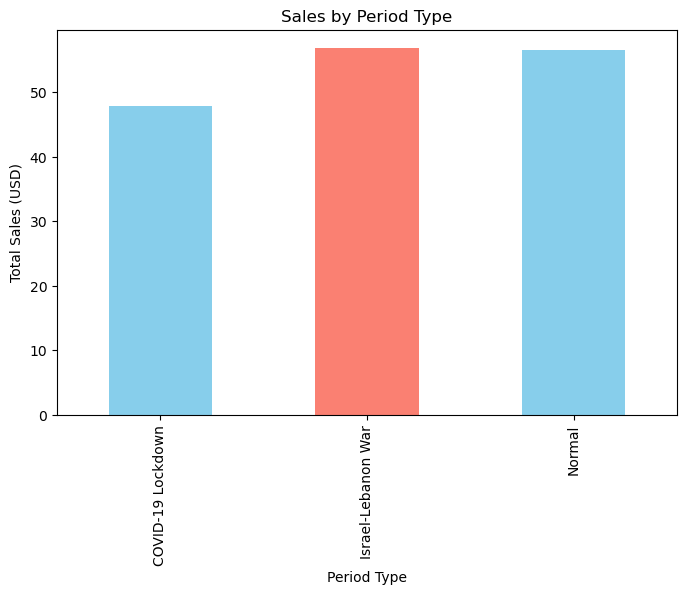

In [44]:
import matplotlib.pyplot as plt

Clean2.groupby('Period Type')['Sale Amount in USD'].mean().plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])
plt.title('Sales by Period Type')
plt.xlabel('Period Type')
plt.ylabel('Total Sales (USD)')
plt.show()


## Top Performing Brands (Family Name):

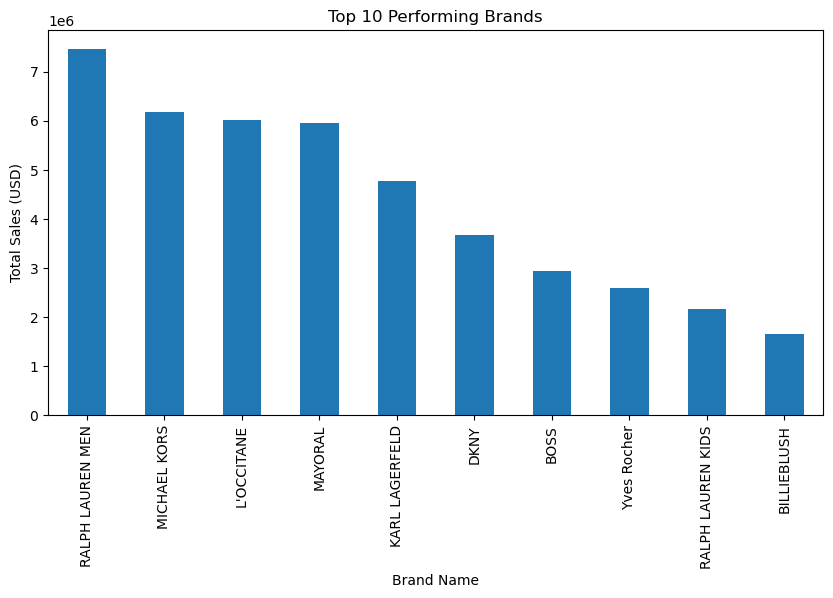

In [45]:
Clean2.groupby('Family Name')['Sale Amount in USD'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Performing Brands')
plt.xlabel('Brand Name')
plt.ylabel('Total Sales (USD)')
plt.show()


## Impact of Crises on Sales Over Time:


Posting Date          datetime64[ns]
Item Description              object
Season                        object
Location Code                 object
Cost Center Code              object
Family Name                   object
Division Name                 object
Category Name                 object
Product Group Name            object
Gender                        object
Quantity                     float64
Cost Amount                  float64
Sale Amount                  float64
Discount Amount              float64
Exchange Rate                float64
Cost in USD                  float64
Sale Amount in USD           float64
Profit                       float64
Period Type                   object
Category                      object
Month                          int32
Location Name                 object
Cost Center Name              object
Latitude                     float64
Longitude                    float64
Profit Per Unit              float64
Profit Margin USD            float64
Y

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


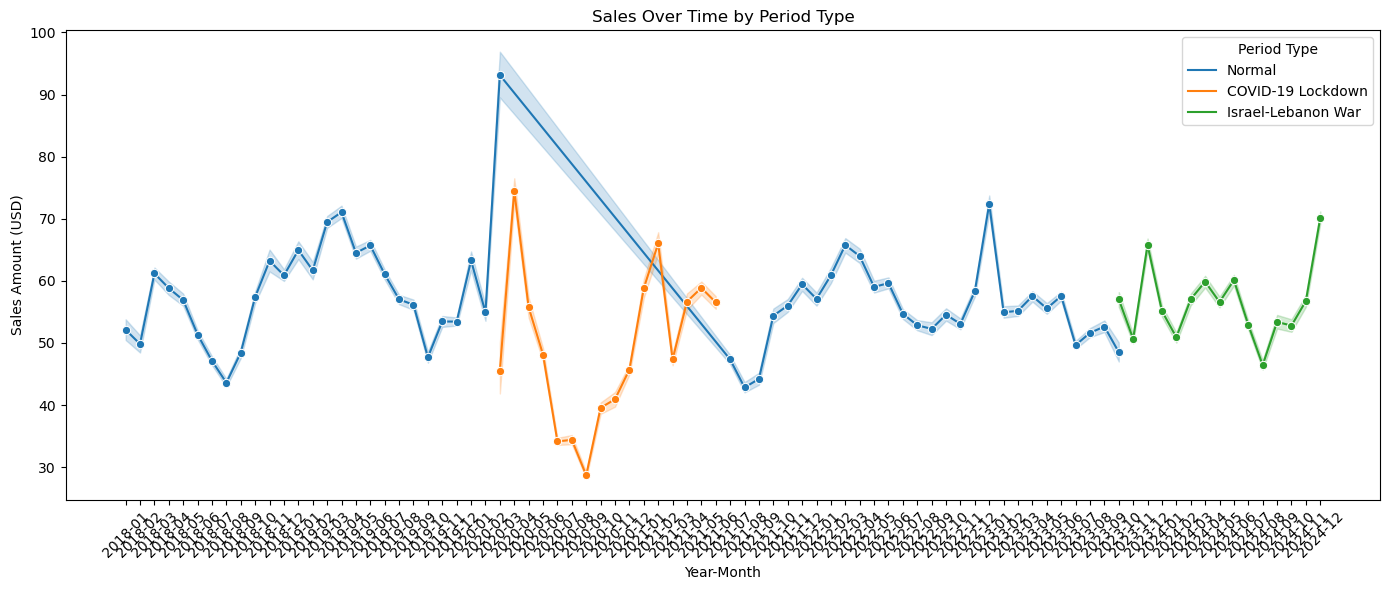

In [46]:

# Create 'Year-Month' as a string for plotting
Clean2['Year-Month'] = Clean2['Posting Date'].dt.to_period('M').astype(str)

# Convert 'Sale Amount in USD' to numeric and handle errors
Clean2['Sale Amount in USD'] = pd.to_numeric(Clean2['Sale Amount in USD'], errors='coerce')

# Drop rows with missing data in critical columns
Clean2 = Clean2.dropna(subset=['Year-Month', 'Sale Amount in USD', 'Period Type'])

# Verify the data types and unique Period Types
print(Clean2.dtypes)
print("Unique Period Types:", Clean2['Period Type'].unique())

# Re-run the plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.lineplot(data=Clean2, x='Year-Month', y='Sale Amount in USD', hue='Period Type', marker='o')
plt.title('Sales Over Time by Period Type')
plt.xlabel('Year-Month')
plt.ylabel('Sales Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Sales Distribution by Location:



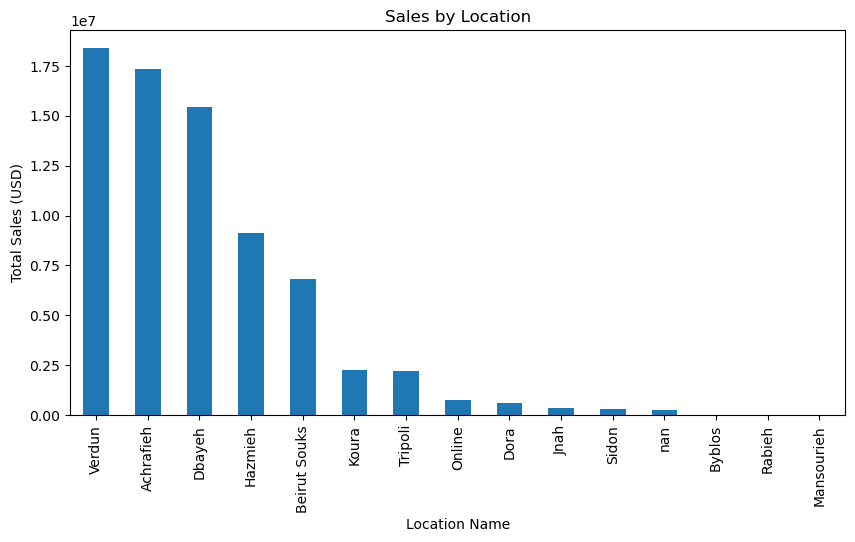

In [47]:
Clean2.groupby('Location Name')['Sale Amount in USD'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Sales by Location')
plt.xlabel('Location Name')
plt.ylabel('Total Sales (USD)')
plt.show()


## Comparing the prices of the top brands

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


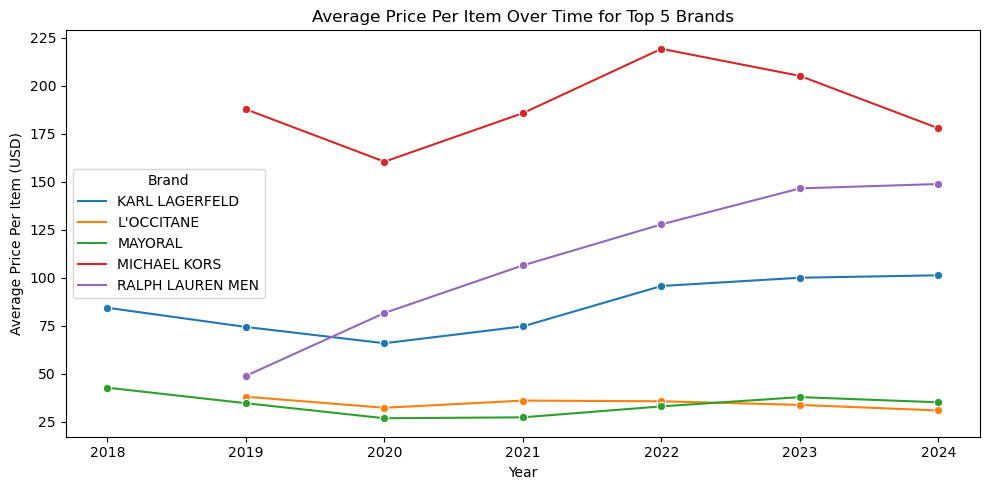

In [48]:
import seaborn as sns

#Calculate Price Per Item
Clean2['Price Per Item'] = Clean2['Sale Amount in USD'] / Clean2['Quantity'].abs()

#Extract Year from 'Posting Date' (already in datetime format)
Clean2['Year'] = Clean2['Posting Date'].dt.year

#Identify Top 5 Brands Based on Total Sales
top_brands = Clean2.groupby('Family Name')['Sale Amount in USD'].sum().sort_values(ascending=False).head(5).index.tolist()

#Filter Data for Top 5 Brands
top_brands_df = Clean2[Clean2['Family Name'].isin(top_brands)]

#Group by Year and Brand to Calculate Average Price
price_trend = top_brands_df.groupby(['Family Name', 'Year'])['Price Per Item'].mean().reset_index()

#Plot the Average Price Trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=price_trend, x='Year', y='Price Per Item', hue='Family Name', marker='o')
plt.title('Average Price Per Item Over Time for Top 5 Brands')
plt.xlabel('Year')
plt.ylabel('Average Price Per Item (USD)')
plt.legend(title='Brand')
plt.tight_layout()
plt.show()


## Profit over different periods

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


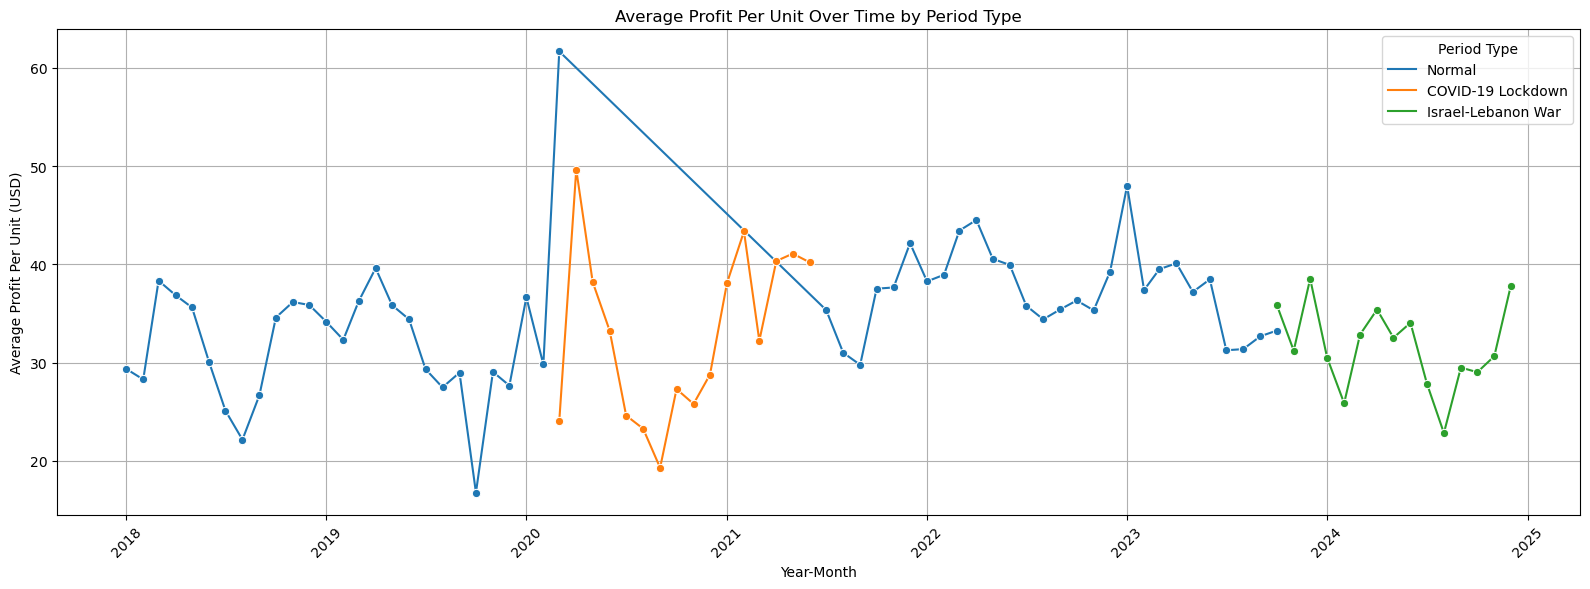

In [49]:
# Group by Year-Month and Period Type to get average profit per unit
profit_period = Clean2.groupby(["Year-Month", "Period Type"])["Profit Per Unit"].mean().reset_index()
profit_period["Year-Month"] = pd.to_datetime(profit_period["Year-Month"])

# Plotting
plt.figure(figsize=(16, 6))
sns.lineplot(data=profit_period, x="Year-Month", y="Profit Per Unit", hue="Period Type", marker="o")
plt.title("Average Profit Per Unit Over Time by Period Type")
plt.xlabel("Year-Month")
plt.ylabel("Average Profit Per Unit (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Period Type")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


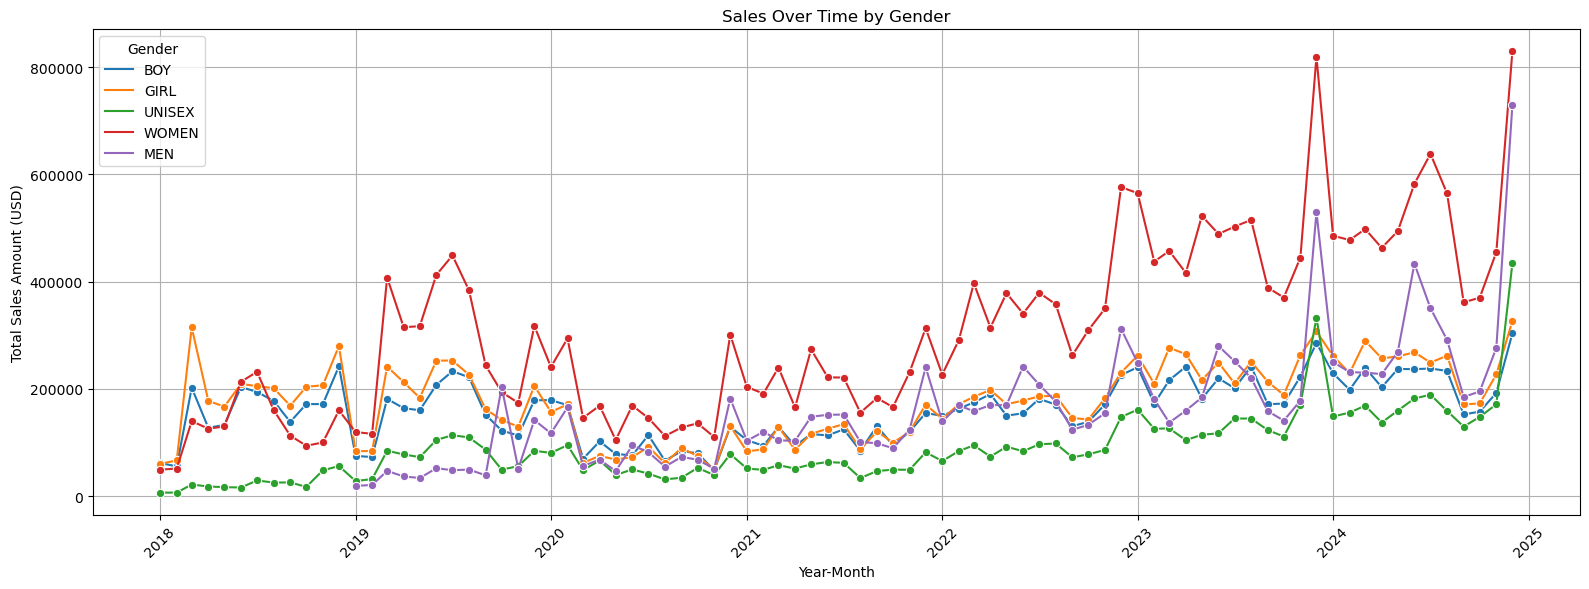

In [50]:
# Group by Year-Month and Gender to get total sale amount
gender_sales = Clean2.groupby(["Year-Month", "Gender"])["Sale Amount in USD"].sum().reset_index()
gender_sales["Year-Month"] = pd.to_datetime(gender_sales["Year-Month"])

# Plotting
plt.figure(figsize=(16, 6))
sns.lineplot(data=gender_sales, x="Year-Month", y="Sale Amount in USD", hue="Gender", marker="o")
plt.title("Sales Over Time by Gender")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales Amount (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Gender")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


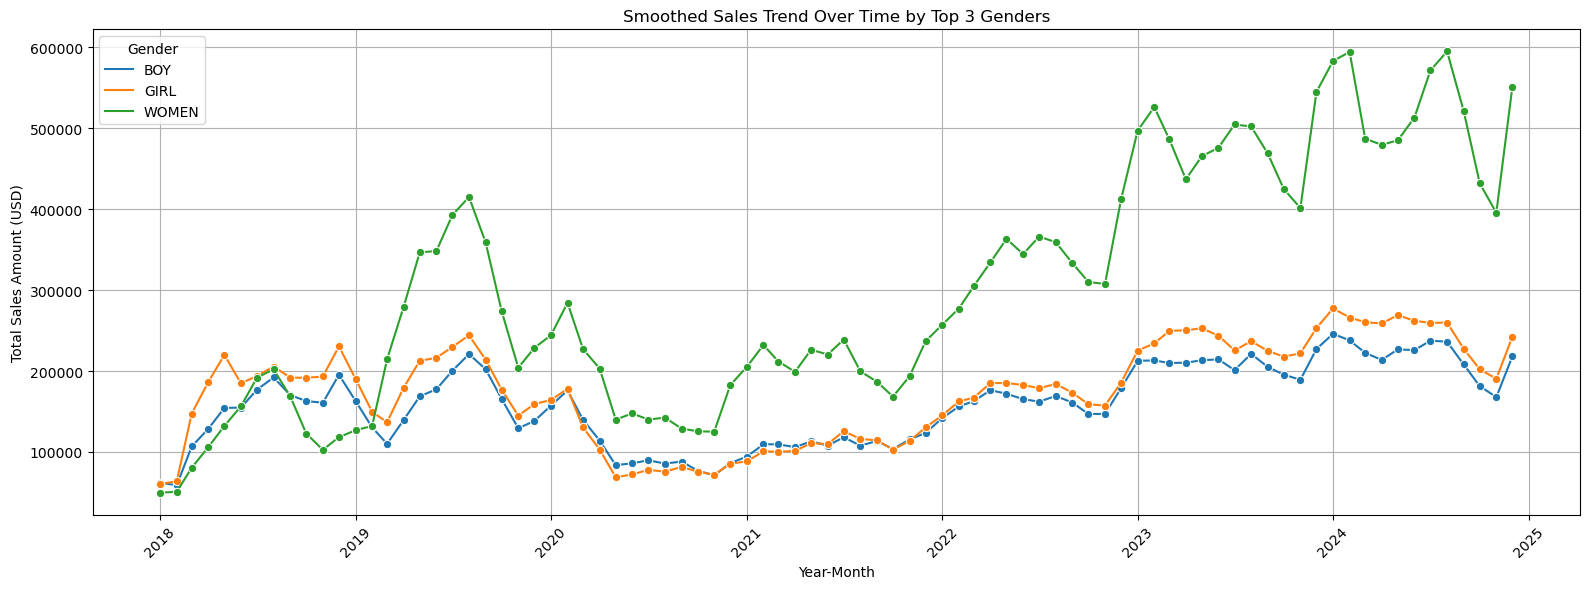

In [51]:
# Step 1: Group by Year-Month and Gender to calculate total sales
gender_sales = Clean2.groupby(["Year-Month", "Gender"])["Sale Amount in USD"].sum().reset_index()
gender_sales["Year-Month"] = pd.to_datetime(gender_sales["Year-Month"])

# Step 2: Identify top 3 gender segments by overall total sales
top_genders = gender_sales.groupby("Gender")["Sale Amount in USD"].sum().nlargest(3).index.tolist()

# Step 3: Filter to only top 3 gender segments
filtered_gender_sales = gender_sales[gender_sales["Gender"].isin(top_genders)]

# Step 4: Apply rolling average manually for each group, excluding non-numeric columns from rolling
smoothed = (
    filtered_gender_sales
    .sort_values("Year-Month")
    .groupby("Gender")
    .apply(lambda x: x.assign(**{
        "Sale Amount in USD (Smoothed)": x["Sale Amount in USD"].rolling(window=3, min_periods=1).mean()
    }))
    .reset_index(drop=True)
)

# Step 5: Plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=smoothed, x="Year-Month", y="Sale Amount in USD (Smoothed)", hue="Gender", marker="o")
plt.title("Smoothed Sales Trend Over Time by Top 3 Genders")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales Amount (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Gender")
plt.ticklabel_format(style='plain', axis='y')
plt.show()




## XGBoost + HoltWinters

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\2113815430.py:143: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


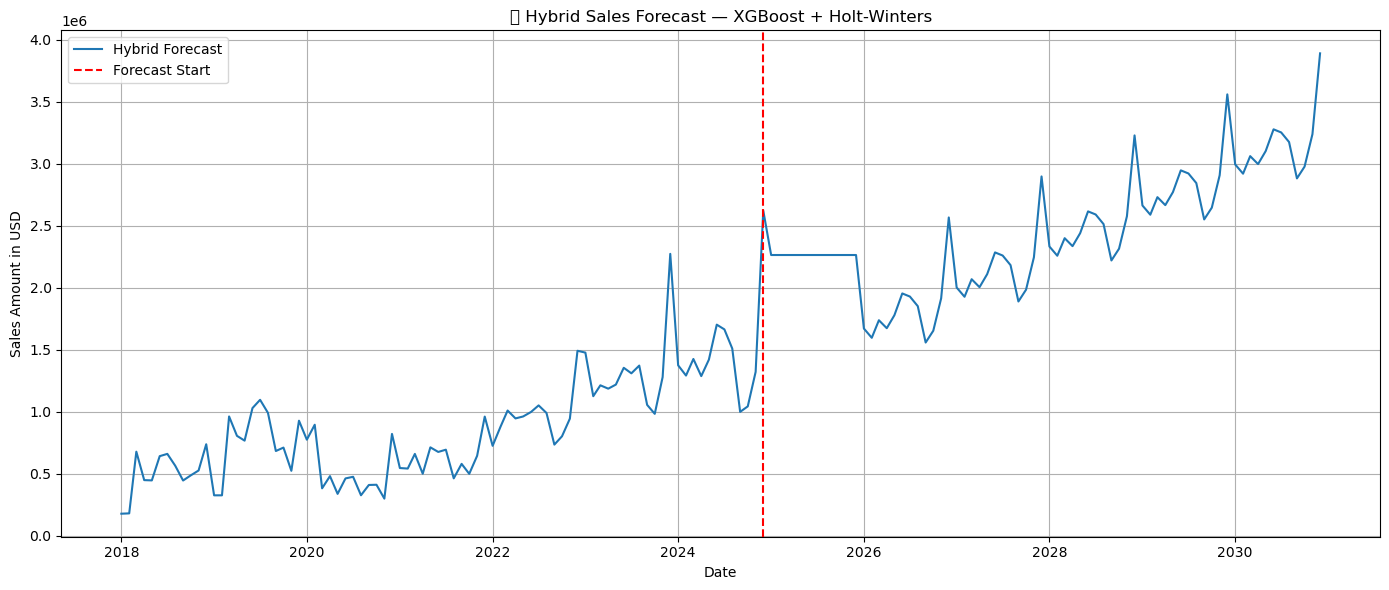

✅ Forecast saved as 'hybrid_forecast_xgb_holtwinters.csv'


In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- STEP 1: Prepare Data ---
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
Clean2["Period Type"] = Clean2["Period Type"].astype("category")
Clean2["Period_Code"] = Clean2["Period Type"].cat.codes

# Monthly total sales
monthly_total = Clean2.groupby("Year-Month")["Sale Amount in USD"].sum().reset_index()

# Period type mode per month
monthly_period = Clean2.groupby("Year-Month")["Period_Code"].agg(lambda x: x.mode()[0] if not x.mode().empty else 1).reset_index()

# Gender-based sales
monthly_gender = (
    Clean2.groupby(["Year-Month", "Gender"])["Sale Amount in USD"]
    .sum()
    .unstack(fill_value=0)
    .reset_index()
)
monthly_gender.columns.name = None
monthly_gender = monthly_gender.rename(columns={
    "BOY": "Sales_Boy", "GIRL": "Sales_Girl", "MEN": "Sales_Men",
    "WOMEN": "Sales_Women", "UNISEX": "Sales_Unisex"
})

# Merge everything
monthly_sales = monthly_total.merge(monthly_period, on="Year-Month").merge(monthly_gender, on="Year-Month", how="left")
monthly_sales["Year"] = monthly_sales["Year-Month"].dt.year
monthly_sales["Month"] = monthly_sales["Year-Month"].dt.month
monthly_sales["sin_month"] = np.sin(2 * np.pi * monthly_sales["Month"] / 12)
monthly_sales["cos_month"] = np.cos(2 * np.pi * monthly_sales["Month"] / 12)

# Lag features
monthly_sales["Lag_1"] = monthly_sales["Sale Amount in USD"].shift(1)
monthly_sales["Lag_2"] = monthly_sales["Sale Amount in USD"].shift(2)
monthly_sales["Lag_3"] = monthly_sales["Sale Amount in USD"].shift(3)
monthly_sales["MA_3"] = monthly_sales["Sale Amount in USD"].rolling(window=3).mean()

data = monthly_sales.dropna().reset_index(drop=True)

# --- STEP 2: Train XGBoost for Short-Term Forecast ---
features = [
    "Year", "Month", "Lag_1", "Lag_2", "Lag_3", "MA_3", "Period_Code",
    "sin_month", "cos_month",
    "Sales_Boy", "Sales_Girl", "Sales_Men", "Sales_Women", "Sales_Unisex"
]
X = data[features]
y = data["Sale Amount in USD"]

X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict next 12 months using XGBoost
last_date = monthly_sales["Year-Month"].max()
future_dates_xgb = pd.date_range(last_date + pd.DateOffset(months=1), periods=12, freq="MS")

future_xgb = pd.DataFrame({"Year-Month": future_dates_xgb})
future_xgb["Year"] = future_xgb["Year-Month"].dt.year
future_xgb["Month"] = future_xgb["Year-Month"].dt.month
future_xgb["sin_month"] = np.sin(2 * np.pi * future_xgb["Month"] / 12)
future_xgb["cos_month"] = np.cos(2 * np.pi * future_xgb["Month"] / 12)
future_xgb["Period_Code"] = 1  # Assume Normal

# Fill gender columns using most recent month
last_gender = monthly_sales.iloc[-1][["Sales_Boy", "Sales_Girl", "Sales_Men", "Sales_Women", "Sales_Unisex"]]
for col in last_gender.index:
    future_xgb[col] = last_gender[col]

# Rolling lag logic
history = monthly_sales.copy()
xgb_forecasts = []

for i in range(len(future_xgb)):
    last_known = history.iloc[-3:]
    lag_1 = history.iloc[-1]["Sale Amount in USD"]
    lag_2 = history.iloc[-2]["Sale Amount in USD"]
    lag_3 = history.iloc[-3]["Sale Amount in USD"]
    ma_3 = last_known["Sale Amount in USD"].mean()

    row = future_xgb.iloc[i]
    X_pred = pd.DataFrame({
        "Year": [row["Year"]],
        "Month": [row["Month"]],
        "Lag_1": [lag_1],
        "Lag_2": [lag_2],
        "Lag_3": [lag_3],
        "MA_3": [ma_3],
        "Period_Code": [row["Period_Code"]],
        "sin_month": [row["sin_month"]],
        "cos_month": [row["cos_month"]],
        "Sales_Boy": [row["Sales_Boy"]],
        "Sales_Girl": [row["Sales_Girl"]],
        "Sales_Men": [row["Sales_Men"]],
        "Sales_Women": [row["Sales_Women"]],
        "Sales_Unisex": [row["Sales_Unisex"]],
    })

    prediction = xgb_model.predict(X_pred)[0]
    xgb_forecasts.append(prediction)

    new_row = pd.DataFrame({
        "Year-Month": [row["Year-Month"]],
        "Sale Amount in USD": [prediction],
        **X_pred.iloc[0].to_dict()
    })
    history = pd.concat([history, new_row], ignore_index=True)

# --- STEP 3: Holt-Winters for Long-Term (Months 13–60) ---
hw_model = ExponentialSmoothing(
    monthly_sales["Sale Amount in USD"], trend="add", seasonal="add", seasonal_periods=12
).fit()

hw_forecast = hw_model.forecast(60)  # 5 years

# --- STEP 4: Combine and Plot ---
xgb_forecast_df = pd.DataFrame({
    "Year-Month": future_dates_xgb,
    "Sale Amount in USD": xgb_forecasts
})

hw_forecast_df = pd.DataFrame({
    "Year-Month": pd.date_range(future_dates_xgb[-1] + pd.DateOffset(months=1), periods=60, freq="MS"),
    "Sale Amount in USD": hw_forecast.values
})

full_forecast = pd.concat([monthly_sales[["Year-Month", "Sale Amount in USD"]], xgb_forecast_df, hw_forecast_df])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(full_forecast["Year-Month"], full_forecast["Sale Amount in USD"], label="Hybrid Forecast")
plt.axvline(x=last_date, color='red', linestyle='--', label="Forecast Start")
plt.title("📈 Hybrid Sales Forecast — XGBoost + Holt-Winters")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save full forecast to CSV
full_forecast.to_csv("hybrid_forecast_xgb_holtwinters.csv", index=False)
print("✅ Forecast saved as 'hybrid_forecast_xgb_holtwinters.csv'")

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\1082912758.py:138: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


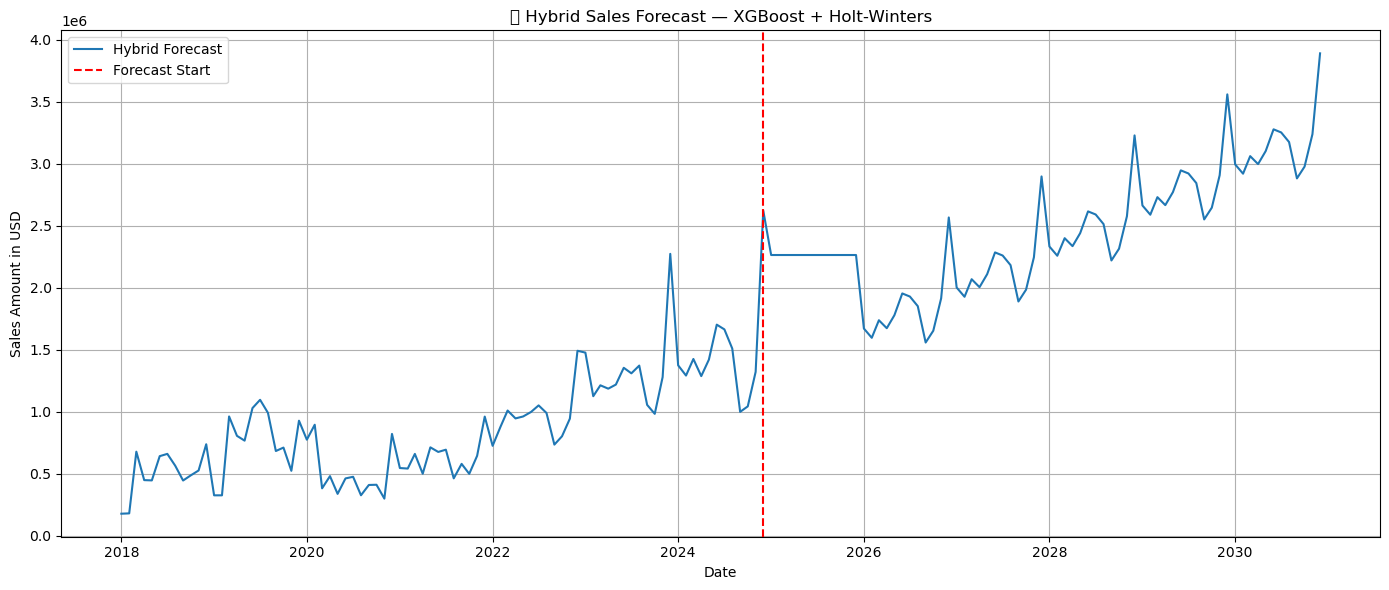

✅ Forecast saved as 'hybrid_forecast_xgb_holtwinters.csv'
📉 In-sample RMSE for XGBoost Model: 1,239.18 USD
📉 In-sample RMSE for Holt-Winters Model: 204,177.78 USD


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\1082912758.py:176: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


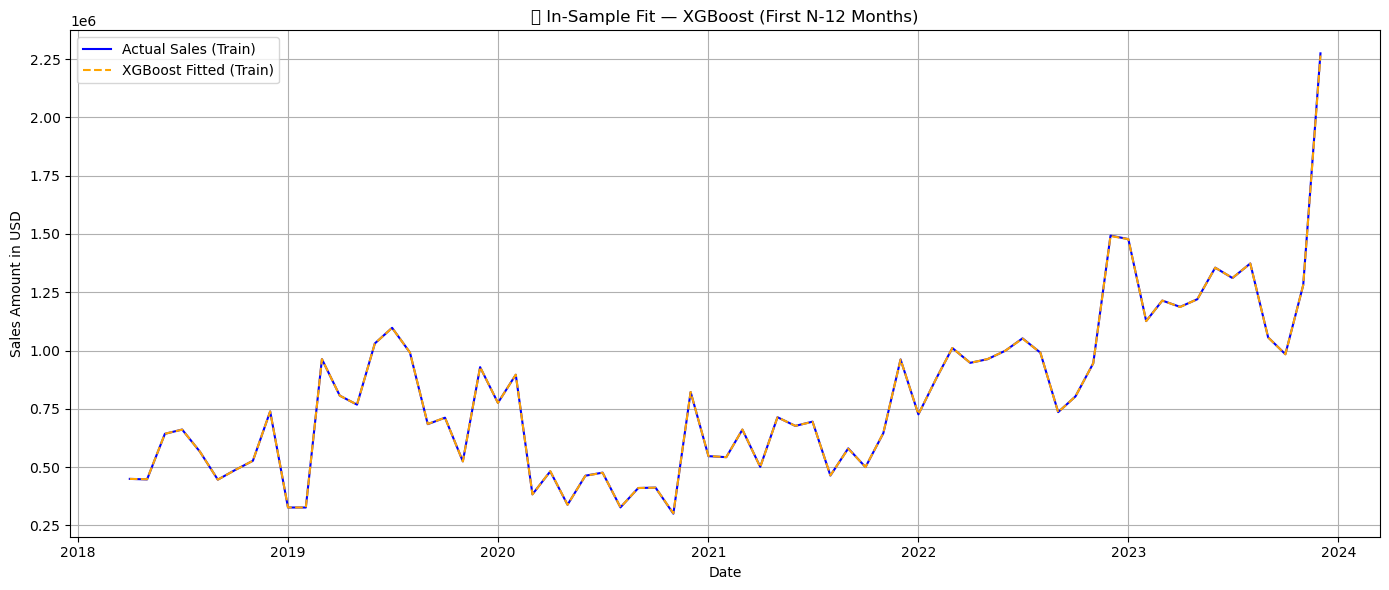

In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# === STEP 1: Prepare the data ===
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
Clean2["Period Type"] = Clean2["Period Type"].astype("category")
Clean2["Period_Code"] = Clean2["Period Type"].cat.codes

monthly_total = Clean2.groupby("Year-Month")["Sale Amount in USD"].sum().reset_index()

monthly_period = Clean2.groupby("Year-Month")["Period_Code"].agg(lambda x: x.mode()[0] if not x.mode().empty else 1).reset_index()

monthly_gender = (
    Clean2.groupby(["Year-Month", "Gender"])["Sale Amount in USD"]
    .sum()
    .unstack(fill_value=0)
    .reset_index()
)
monthly_gender.columns.name = None
monthly_gender = monthly_gender.rename(columns={
    "BOY": "Sales_Boy", "GIRL": "Sales_Girl", "MEN": "Sales_Men",
    "WOMEN": "Sales_Women", "UNISEX": "Sales_Unisex"
})

monthly_sales = monthly_total.merge(monthly_period, on="Year-Month").merge(monthly_gender, on="Year-Month", how="left")
monthly_sales["Year"] = monthly_sales["Year-Month"].dt.year
monthly_sales["Month"] = monthly_sales["Year-Month"].dt.month
monthly_sales["sin_month"] = np.sin(2 * np.pi * monthly_sales["Month"] / 12)
monthly_sales["cos_month"] = np.cos(2 * np.pi * monthly_sales["Month"] / 12)

monthly_sales["Lag_1"] = monthly_sales["Sale Amount in USD"].shift(1)
monthly_sales["Lag_2"] = monthly_sales["Sale Amount in USD"].shift(2)
monthly_sales["Lag_3"] = monthly_sales["Sale Amount in USD"].shift(3)
monthly_sales["MA_3"] = monthly_sales["Sale Amount in USD"].rolling(window=3).mean()

data = monthly_sales.dropna().reset_index(drop=True)

# === STEP 2: XGBoost Short-Term Model ===
features = [
    "Year", "Month", "Lag_1", "Lag_2", "Lag_3", "MA_3", "Period_Code",
    "sin_month", "cos_month",
    "Sales_Boy", "Sales_Girl", "Sales_Men", "Sales_Women", "Sales_Unisex"
]
X = data[features]
y = data["Sale Amount in USD"]

X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# === STEP 3: Forecast 12 months with XGBoost ===
last_date = monthly_sales["Year-Month"].max()
future_dates_xgb = pd.date_range(last_date + pd.DateOffset(months=1), periods=12, freq="MS")

future_xgb = pd.DataFrame({"Year-Month": future_dates_xgb})
future_xgb["Year"] = future_xgb["Year-Month"].dt.year
future_xgb["Month"] = future_xgb["Year-Month"].dt.month
future_xgb["sin_month"] = np.sin(2 * np.pi * future_xgb["Month"] / 12)
future_xgb["cos_month"] = np.cos(2 * np.pi * future_xgb["Month"] / 12)
future_xgb["Period_Code"] = 1  # Assume Normal

last_gender = monthly_sales.iloc[-1][["Sales_Boy", "Sales_Girl", "Sales_Men", "Sales_Women", "Sales_Unisex"]]
for col in last_gender.index:
    future_xgb[col] = last_gender[col]

history = monthly_sales.copy()
xgb_forecasts = []

for i in range(len(future_xgb)):
    last_known = history.iloc[-3:]
    lag_1 = history.iloc[-1]["Sale Amount in USD"]
    lag_2 = history.iloc[-2]["Sale Amount in USD"]
    lag_3 = history.iloc[-3]["Sale Amount in USD"]
    ma_3 = last_known["Sale Amount in USD"].mean()

    row = future_xgb.iloc[i]
    X_pred = pd.DataFrame({
        "Year": [row["Year"]],
        "Month": [row["Month"]],
        "Lag_1": [lag_1],
        "Lag_2": [lag_2],
        "Lag_3": [lag_3],
        "MA_3": [ma_3],
        "Period_Code": [row["Period_Code"]],
        "sin_month": [row["sin_month"]],
        "cos_month": [row["cos_month"]],
        "Sales_Boy": [row["Sales_Boy"]],
        "Sales_Girl": [row["Sales_Girl"]],
        "Sales_Men": [row["Sales_Men"]],
        "Sales_Women": [row["Sales_Women"]],
        "Sales_Unisex": [row["Sales_Unisex"]],
    })

    prediction = xgb_model.predict(X_pred)[0]
    xgb_forecasts.append(prediction)

    new_row = pd.DataFrame({
        "Year-Month": [row["Year-Month"]],
        "Sale Amount in USD": [prediction],
        **X_pred.iloc[0].to_dict()
    })
    history = pd.concat([history, new_row], ignore_index=True)

xgb_forecast_df = pd.DataFrame({
    "Year-Month": future_dates_xgb,
    "Sale Amount in USD": xgb_forecasts
})

# === STEP 4: Holt-Winters for Long-Term Forecast ===
hw_model = ExponentialSmoothing(
    monthly_sales["Sale Amount in USD"], trend="add", seasonal="add", seasonal_periods=12
).fit()
hw_forecast = hw_model.forecast(60)

hw_forecast_df = pd.DataFrame({
    "Year-Month": pd.date_range(future_dates_xgb[-1] + pd.DateOffset(months=1), periods=60, freq="MS"),
    "Sale Amount in USD": hw_forecast.values
})

full_forecast = pd.concat([
    monthly_sales[["Year-Month", "Sale Amount in USD"]],
    xgb_forecast_df,
    hw_forecast_df
])

# === STEP 5: Plot Forecast ===
plt.figure(figsize=(14, 6))
plt.plot(full_forecast["Year-Month"], full_forecast["Sale Amount in USD"], label="Hybrid Forecast")
plt.axvline(x=last_date, color='red', linestyle='--', label="Forecast Start")
plt.title("📈 Hybrid Sales Forecast — XGBoost + Holt-Winters")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === STEP 6: Save Forecast ===
full_forecast.to_csv("hybrid_forecast_xgb_holtwinters.csv", index=False)
print("✅ Forecast saved as 'hybrid_forecast_xgb_holtwinters.csv'")

# === STEP 7: In-Sample RMSE on XGBoost Training Data ===
X_insample = X_train.copy()
y_insample = y_train.copy()
y_pred_insample = xgb_model.predict(X_insample)

rmse_insample = mean_squared_error(y_insample, y_pred_insample, squared=False)
print(f"📉 In-sample RMSE for XGBoost Model: {rmse_insample:,.2f} USD")

# === STEP 9: In-sample RMSE for Holt-Winters ===
hw_fitted = hw_model.fittedvalues
hw_actual = monthly_sales["Sale Amount in USD"]

# Drop NA caused by warmup
hw_comparison = pd.DataFrame({
    "Actual": hw_actual,
    "HW_Fitted": hw_fitted
}).dropna()

rmse_hw = mean_squared_error(hw_comparison["Actual"], hw_comparison["HW_Fitted"], squared=False)
print(f"📉 In-sample RMSE for Holt-Winters Model: {rmse_hw:,.2f} USD")


# === STEP 10: Plot In-Sample Actual vs Predicted ===
plt.figure(figsize=(14, 6))
plt.plot(data["Year-Month"][:-12], y_insample.values, label="Actual Sales (Train)", color="blue")
plt.plot(data["Year-Month"][:-12], y_pred_insample, label="XGBoost Fitted (Train)", linestyle="--", color="orange")
plt.title("📊 In-Sample Fit — XGBoost (First N-12 Months)")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## SARIMAX

In [54]:
pip install statsmodels pandas numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\3896831121.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


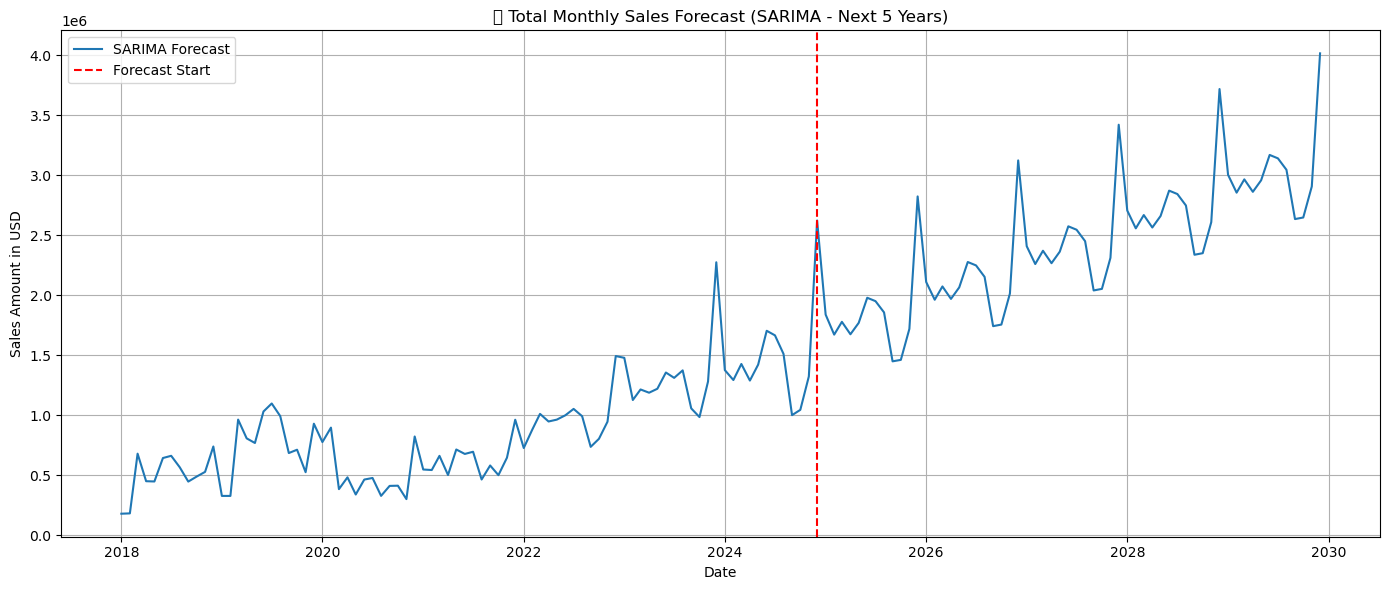

✅ Forecast saved as 'total_sales_forecast_sarima.csv'


In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# STEP 1: Prepare data
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)

# Set date as index
monthly_sales.set_index("Year-Month", inplace=True)

# STEP 2: Fit SARIMA model
# Basic SARIMA parameters (you can tune these later)
model = SARIMAX(
    monthly_sales,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# STEP 3: Forecast next 60 months
forecast_steps = 60
future_dates = pd.date_range(monthly_sales.index.max() + pd.DateOffset(months=1), periods=forecast_steps, freq="MS")
sarima_forecast = model.get_forecast(steps=forecast_steps)
forecast_values = sarima_forecast.predicted_mean

# Combine with history
forecast_df = pd.DataFrame({
    "Year-Month": future_dates,
    "Forecasted Sale Amount in USD": forecast_values.values
})

historical_df = monthly_sales.reset_index().rename(columns={"Sale Amount in USD": "Forecasted Sale Amount in USD"})
full_forecast = pd.concat([historical_df, forecast_df], ignore_index=True)

# STEP 4: Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(full_forecast["Year-Month"], full_forecast["Forecasted Sale Amount in USD"], label="SARIMA Forecast")
plt.axvline(x=monthly_sales.index.max(), color='red', linestyle='--', label='Forecast Start')
plt.title("📈 Total Monthly Sales Forecast (SARIMA - Next 5 Years)")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# STEP 5: Export to CSV
full_forecast.to_csv("total_sales_forecast_sarima.csv", index=False)
print("✅ Forecast saved as 'total_sales_forecast_sarima.csv'")


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


🧪 Sample predictions:
            Sale Amount in USD     Predicted
Year-Month                                  
2024-08-01        1.510894e+06  1.621687e+06
2024-09-01        1.000304e+06  1.301827e+06
2024-10-01        1.044416e+06  1.098148e+06
2024-11-01        1.322875e+06  1.317315e+06
2024-12-01        2.623077e+06  2.122112e+06
📉 In-sample RMSE for SARIMA Model: 213,371.01 USD


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\3663238683.py:54: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


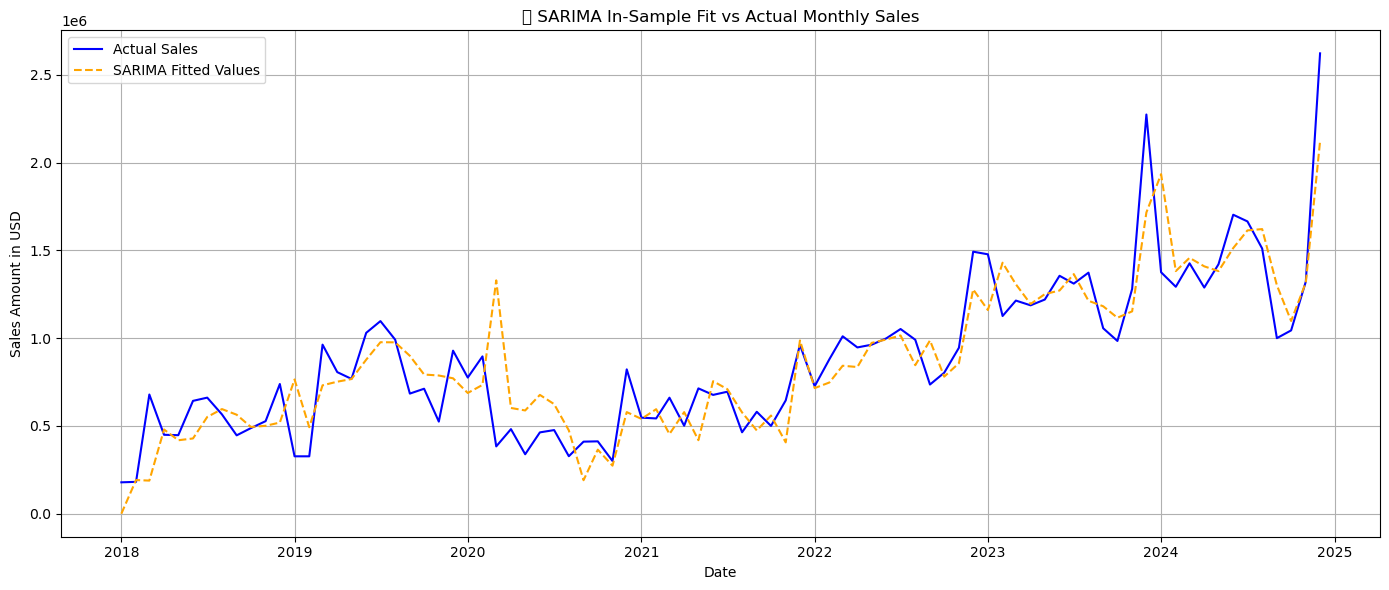

In [56]:
from sklearn.metrics import mean_squared_error

# === STEP 1: Prepare monthly sales data ===
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)

monthly_sales.set_index("Year-Month", inplace=True)

# === STEP 2: Fit SARIMA on full historical data ===
model = SARIMAX(
    monthly_sales,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# === STEP 3: Get in-sample predictions ===
fitted_values = model.fittedvalues

# === STEP 4: Combine predictions with actuals ===
comparison_df = monthly_sales.copy()
comparison_df["Predicted"] = fitted_values

# Drop NaNs caused by differencing (first few months)
comparison_df.dropna(inplace=True)

# Debug check
print("🧪 Sample predictions:")
print(comparison_df[["Sale Amount in USD", "Predicted"]].tail())

# === STEP 5: Calculate RMSE ===
rmse_insample = mean_squared_error(
    comparison_df["Sale Amount in USD"],
    comparison_df["Predicted"],
    squared=False
)
print(f"📉 In-sample RMSE for SARIMA Model: {rmse_insample:,.2f} USD")

# === STEP 6: Plot actual vs fitted ===
plt.figure(figsize=(14, 6))
plt.plot(comparison_df.index, comparison_df["Sale Amount in USD"], label="Actual Sales", color="blue")
plt.plot(comparison_df.index, comparison_df["Predicted"], label="SARIMA Fitted Values", linestyle="--", color="orange")
plt.title("📈 SARIMA In-Sample Fit vs Actual Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## AUTOARIMA

In [57]:
pip install pmdarima


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1987.290, Time=0.88 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2023.303, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1987.442, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2002.847, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2040.887, Time=0.05 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1985.503, Time=0.57 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1991.860, Time=0.26 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1986.622, Time=1.37 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1989.255, Time=0.69 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=1986.483, Time=1.88 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1983.633, Time=0.54 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1990.112, Time=0.15 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1985.481, Time=0.67 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1984.683, Time=1.11 sec
 ARIMA(1,0,2)(1,1,0

C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\2005222653.py:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


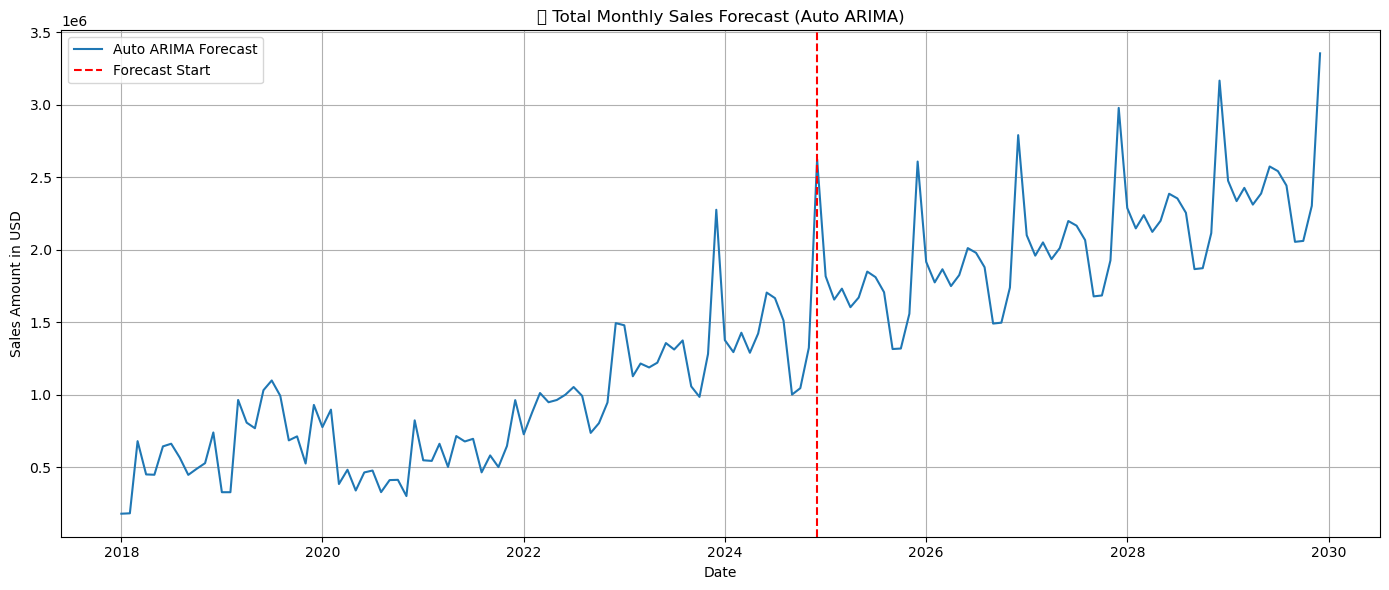

✅ Auto ARIMA forecast saved as 'auto_arima_forecast.csv'


In [58]:
from pmdarima import auto_arima

# Step 1: Prepare data
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)
monthly_sales.set_index("Year-Month", inplace=True)

# Step 2: Fit auto ARIMA
model = auto_arima(
    monthly_sales,
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Step 3: Forecast 60 months
forecast = model.predict(n_periods=60)
forecast_index = pd.date_range(monthly_sales.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS')

# Combine history + forecast
forecast_df = pd.DataFrame({
    "Year-Month": forecast_index,
    "Forecasted Sale Amount in USD": forecast
})
historical_df = monthly_sales.reset_index().rename(columns={"Sale Amount in USD": "Forecasted Sale Amount in USD"})
full_forecast = pd.concat([historical_df, forecast_df], ignore_index=True)

# Step 4: Plot
plt.figure(figsize=(14, 6))
plt.plot(full_forecast["Year-Month"], full_forecast["Forecasted Sale Amount in USD"], label="Auto ARIMA Forecast")
plt.axvline(x=monthly_sales.index.max(), color='red', linestyle='--', label="Forecast Start")
plt.title("📈 Total Monthly Sales Forecast (Auto ARIMA)")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Export
full_forecast.to_csv("auto_arima_forecast.csv", index=False)
print("✅ Auto ARIMA forecast saved as 'auto_arima_forecast.csv'")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1987.290, Time=0.94 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2023.303, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1987.442, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2002.847, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2040.887, Time=0.05 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1985.503, Time=0.92 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1991.860, Time=0.28 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1986.622, Time=1.23 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1989.255, Time=0.81 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=1986.483, Time=2.41 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1983.633, Time=0.54 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1990.112, Time=0.15 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1985.481, Time=0.81 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1984.683, Time=1.27 sec
 ARIMA(1,0,2)(1,1,0

C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\1377232018.py:43: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


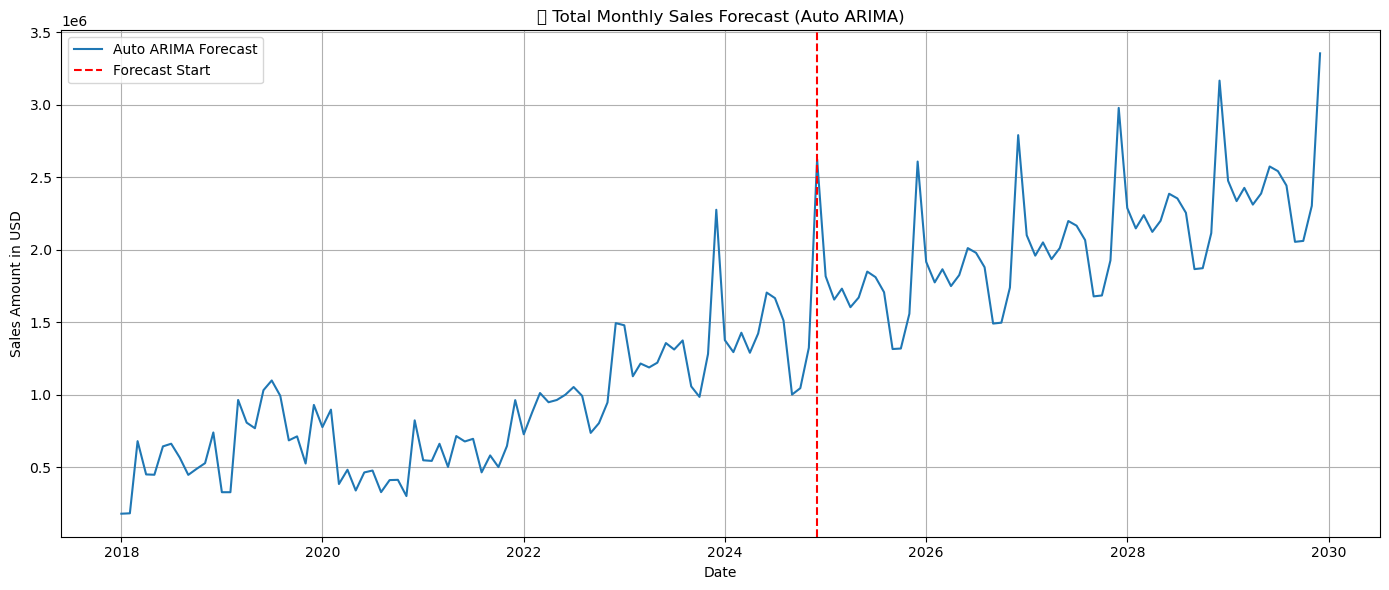

✅ Auto ARIMA forecast saved as 'auto_arima_forecast.csv'
📉 In-sample RMSE for Auto ARIMA: 212,061.64 USD


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\1377232018.py:72: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


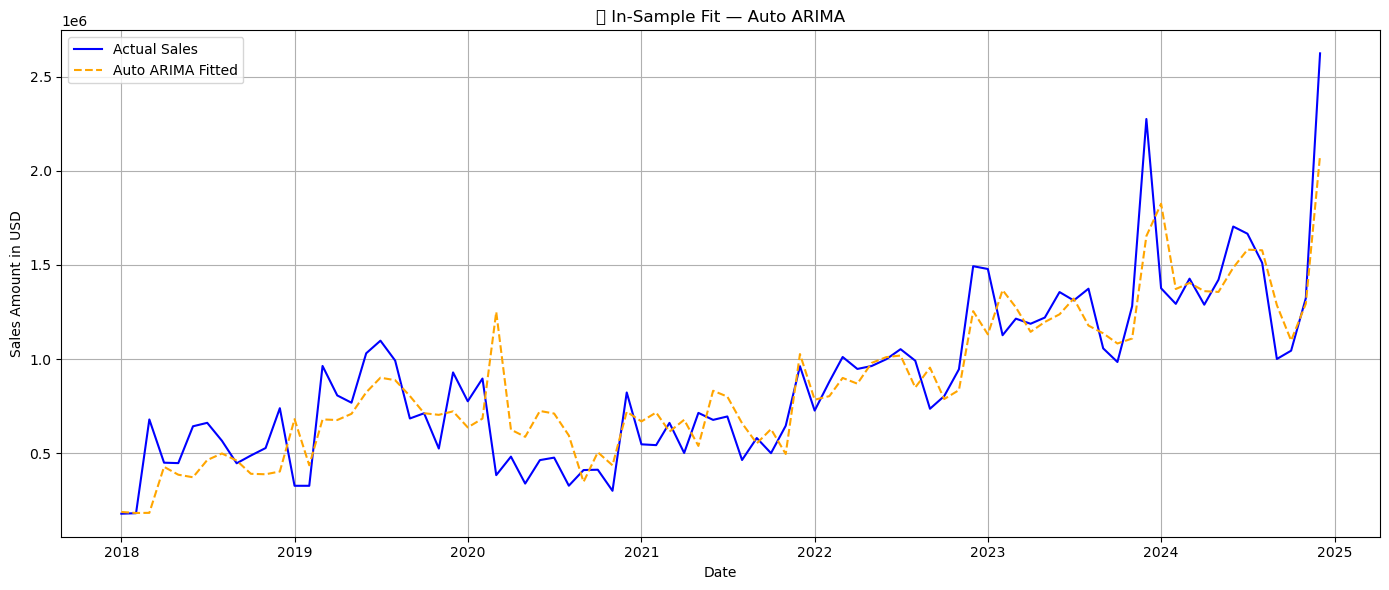

In [59]:
# === STEP 1: Prepare data ===
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)
monthly_sales.set_index("Year-Month", inplace=True)

# === STEP 2: Fit auto ARIMA ===
model = auto_arima(
    monthly_sales,
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# === STEP 3: Forecast next 60 months ===
forecast = model.predict(n_periods=60)
forecast_index = pd.date_range(monthly_sales.index[-1] + pd.DateOffset(months=1), periods=60, freq='MS')

forecast_df = pd.DataFrame({
    "Year-Month": forecast_index,
    "Forecasted Sale Amount in USD": forecast
})

historical_df = monthly_sales.reset_index().rename(columns={"Sale Amount in USD": "Forecasted Sale Amount in USD"})
full_forecast = pd.concat([historical_df, forecast_df], ignore_index=True)

# === STEP 4: Plot full forecast ===
plt.figure(figsize=(14, 6))
plt.plot(full_forecast["Year-Month"], full_forecast["Forecasted Sale Amount in USD"], label="Auto ARIMA Forecast")
plt.axvline(x=monthly_sales.index.max(), color='red', linestyle='--', label="Forecast Start")
plt.title("📈 Total Monthly Sales Forecast (Auto ARIMA)")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === STEP 5: Export forecast to CSV ===
full_forecast.to_csv("auto_arima_forecast.csv", index=False)
print("✅ Auto ARIMA forecast saved as 'auto_arima_forecast.csv'")

# === STEP 6: In-sample prediction and RMSE ===
insample_preds = model.predict_in_sample()
actuals = monthly_sales.squeeze()

# Drop NA if any (to match shapes)
comparison_df = pd.DataFrame({
    "Actual": actuals,
    "Predicted": insample_preds
}).dropna()

rmse_arima = mean_squared_error(comparison_df["Actual"], comparison_df["Predicted"], squared=False)
print(f"📉 In-sample RMSE for Auto ARIMA: {rmse_arima:,.2f} USD")

# === STEP 7: Plot actual vs predicted (in-sample) ===
plt.figure(figsize=(14, 6))
plt.plot(comparison_df.index, comparison_df["Actual"], label="Actual Sales", color="blue")
plt.plot(comparison_df.index, comparison_df["Predicted"], label="Auto ARIMA Fitted", linestyle="--", color="orange")
plt.title("📊 In-Sample Fit — Auto ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Theta

In [60]:
pip install statsforecast matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install threadpoolctl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install --upgrade threadpoolctl


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
from statsforecast import StatsForecast
from statsforecast.models import Theta


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\2200561639.py:43: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


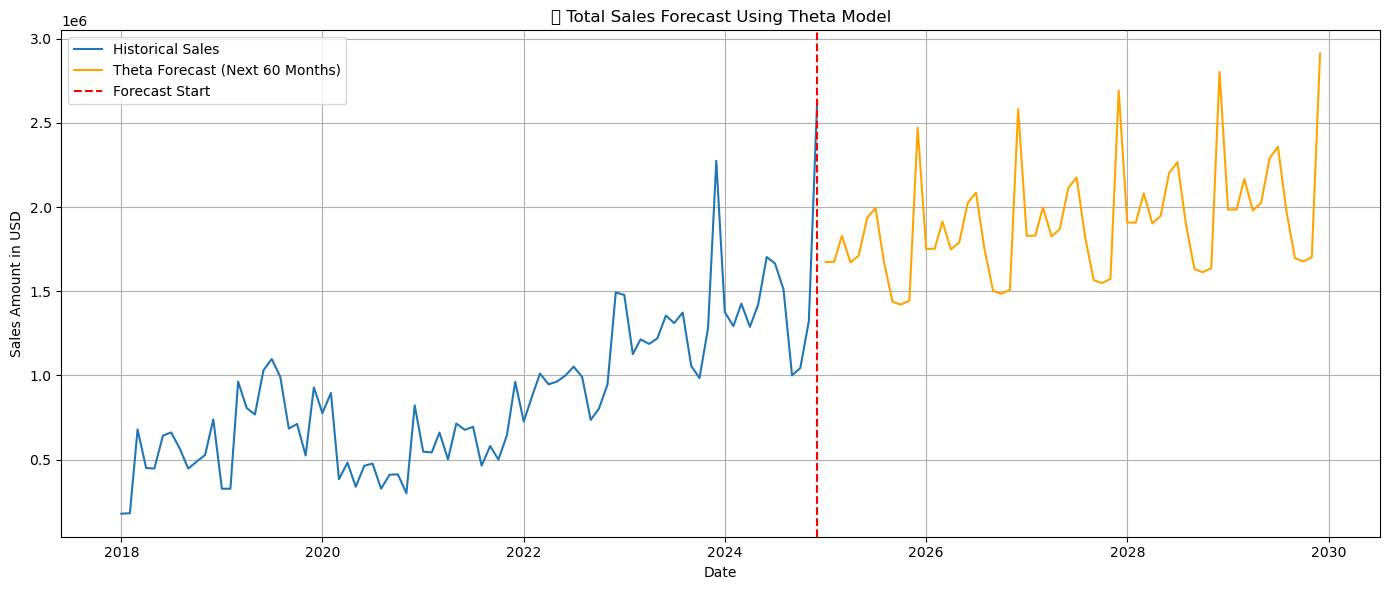

✅ Theta forecast saved as 'theta_forecast.csv'


In [64]:
from statsforecast import StatsForecast
from statsforecast.models import Theta
from datetime import timedelta

# STEP 1: Aggregate data
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)

# STEP 2: Format for StatsForecast
df_theta = monthly_sales.copy()
df_theta.columns = ['ds', 'y']
df_theta['unique_id'] = 'total_sales'  # required column for StatsForecast
df_theta = df_theta[['unique_id', 'ds', 'y']]

# STEP 3: Forecast setup
sf = StatsForecast(
    models=[Theta(season_length=12)],
    freq='MS',
    n_jobs=1
)

# Forecast 60 months
forecast = sf.forecast(df=df_theta, h=60)

# Merge with original
forecast_df = forecast.merge(df_theta, on='ds', how='outer')

# STEP 4: Plot
plt.figure(figsize=(14, 6))
plt.plot(df_theta['ds'], df_theta['y'], label='Historical Sales')
plt.plot(forecast['ds'], forecast['Theta'], label='Theta Forecast (Next 60 Months)', color='orange')
plt.axvline(x=df_theta['ds'].max(), color='red', linestyle='--', label='Forecast Start')
plt.title("📈 Total Sales Forecast Using Theta Model")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# STEP 5: Export
forecast_export = forecast[['ds', 'Theta']].rename(columns={'ds': 'Year-Month', 'Theta': 'Forecasted Sale Amount in USD'})
forecast_export.to_csv("theta_forecast.csv", index=False)
print("✅ Theta forecast saved as 'theta_forecast.csv'")


📉 In-sample RMSE for Theta: 171,765.05 USD


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\987314432.py:54: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


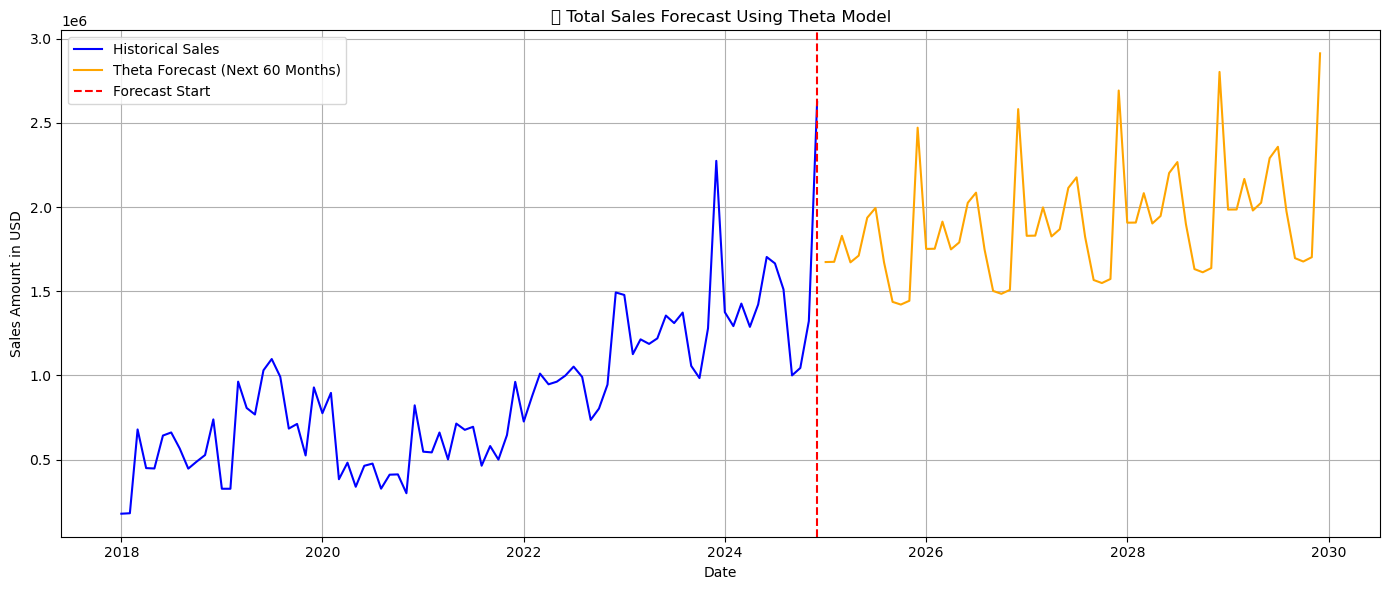

C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\987314432.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


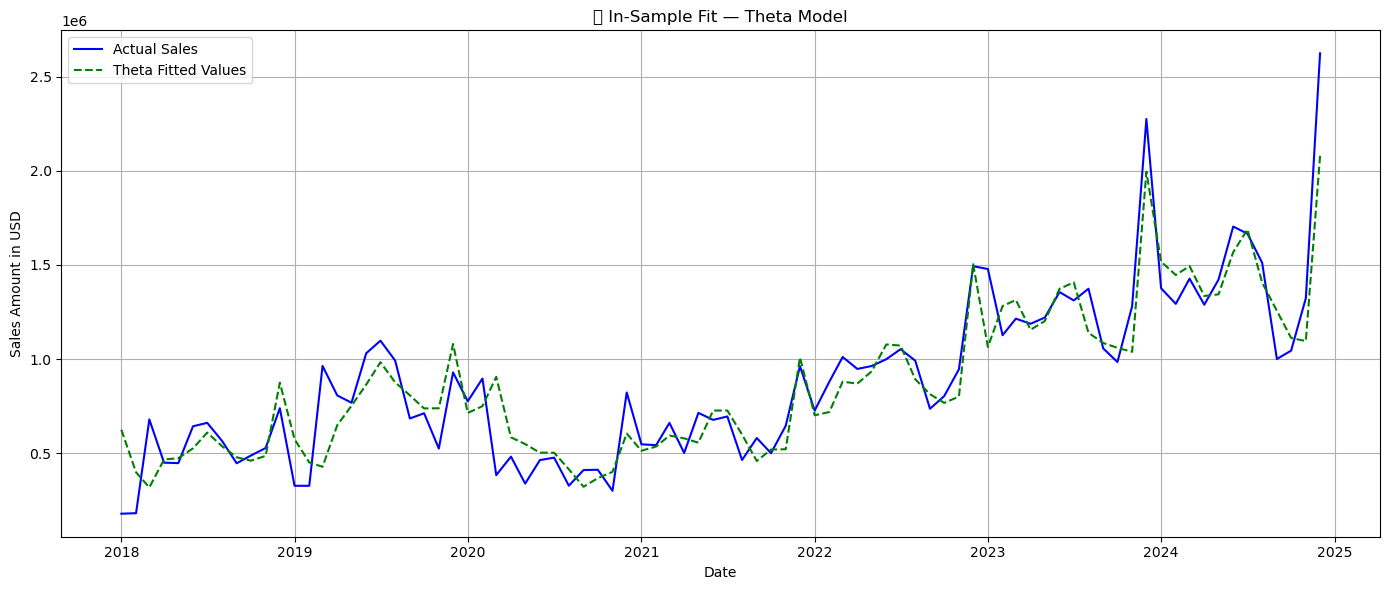

✅ Theta forecast saved as 'theta_forecast.csv'


In [65]:
from statsforecast import StatsForecast
from statsforecast.models import Theta
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# === STEP 1: Aggregate Monthly Sales ===
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)

# === STEP 2: Format for StatsForecast ===
df_theta = monthly_sales.copy()
df_theta.columns = ['ds', 'y']
df_theta['unique_id'] = 'total_sales'
df_theta = df_theta[['unique_id', 'ds', 'y']]

# === STEP 3: Initialize & Fit Forecast ===
sf = StatsForecast(
    models=[Theta(season_length=12)],
    freq='MS',
    n_jobs=1
)

sf_fitted = sf.fit(df_theta)
forecast = sf_fitted.forecast(df=df_theta, h=60, fitted=True)

# === STEP 4: In-Sample Fitted Values & RMSE ===
fitted_vals = sf_fitted.forecast_fitted_values()

# Prepare actuals and fitted
actuals = df_theta[['ds', 'y']].rename(columns={'ds': 'Year-Month', 'y': 'Actual'})
fitted = fitted_vals.rename(columns={'ds': 'Year-Month', 'Theta': 'Predicted'})
merged = pd.merge(actuals, fitted, on='Year-Month', how='inner')

# RMSE Calculation
rmse_theta = mean_squared_error(merged['Actual'], merged['Predicted'], squared=False)
print(f"📉 In-sample RMSE for Theta: {rmse_theta:,.2f} USD")

# === STEP 5: Forecast Plot ===
plt.figure(figsize=(14, 6))
plt.plot(actuals['Year-Month'], actuals['Actual'], label='Historical Sales', color='blue')
plt.plot(forecast['ds'], forecast['Theta'], label='Theta Forecast (Next 60 Months)', color='orange')
plt.axvline(x=actuals['Year-Month'].max(), color='red', linestyle='--', label='Forecast Start')
plt.title("📈 Total Sales Forecast Using Theta Model")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === STEP 6: In-Sample Fit Plot ===
plt.figure(figsize=(14, 6))
plt.plot(merged['Year-Month'], merged['Actual'], label='Actual Sales', color='blue')
plt.plot(merged['Year-Month'], merged['Predicted'], label='Theta Fitted Values', linestyle='--', color='green')
plt.title("📊 In-Sample Fit — Theta Model")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === STEP 7: Export Forecast ===
forecast_export = forecast[['ds', 'Theta']].rename(columns={'ds': 'Year-Month', 'Theta': 'Forecasted Sale Amount in USD'})
forecast_export.to_csv("theta_forecast.csv", index=False)
print("✅ Theta forecast saved as 'theta_forecast.csv'")


## TBATS

In [66]:
pip install tbats


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\1789257335.py:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


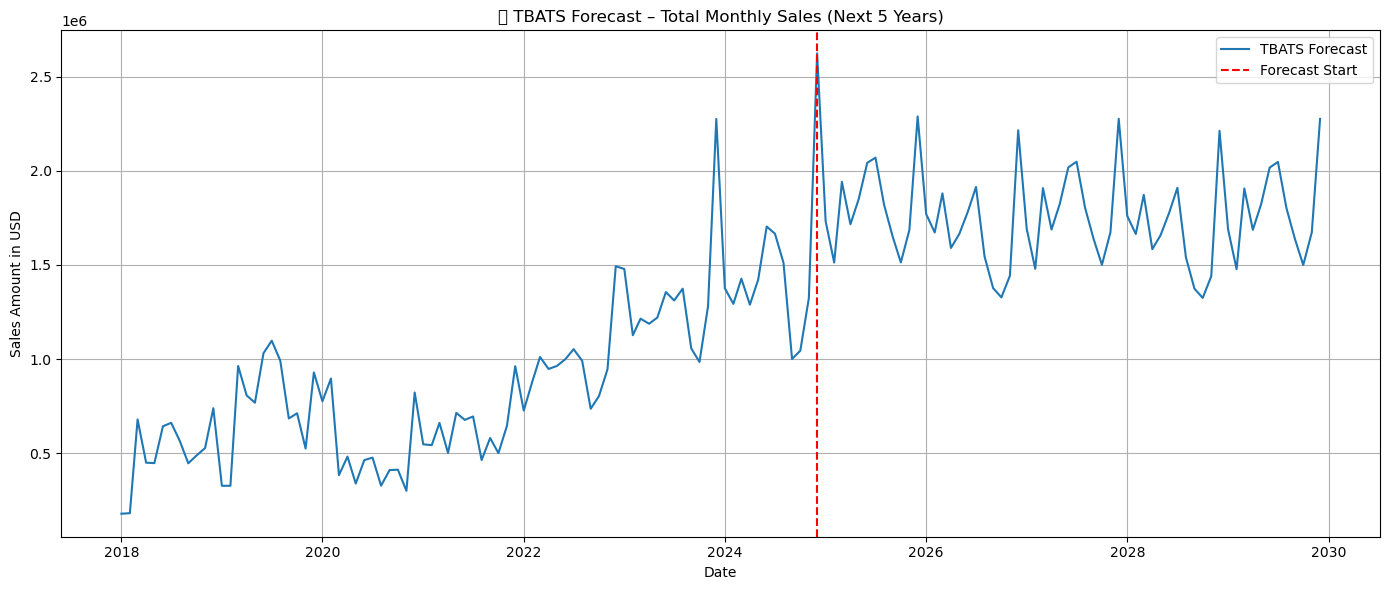

✅ Forecast saved as 'tbats_forecast.csv'


In [67]:

from tbats import TBATS

# Step 1: Prepare monthly data
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)
monthly_sales.set_index("Year-Month", inplace=True)

# Step 2: Extract series
sales_series = monthly_sales["Sale Amount in USD"].values

# Step 3: Fit TBATS model
estimator = TBATS(seasonal_periods=[24])  # 60 = monthly seasonality
model = estimator.fit(sales_series)

# Step 4: Forecast next 60 months
n_months = 60
forecast = model.forecast(steps=n_months)

# Step 5: Build forecast dates
forecast_index = pd.date_range(monthly_sales.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
forecast_df = pd.DataFrame({
    "Year-Month": forecast_index,
    "Forecasted Sale Amount in USD": forecast
})

# Step 6: Combine with history
historical_df = monthly_sales.reset_index().rename(columns={"Sale Amount in USD": "Forecasted Sale Amount in USD"})
TBATsforecast = pd.concat([historical_df, forecast_df], ignore_index=True)

# Step 7: Plot
plt.figure(figsize=(14, 6))
plt.plot(TBATsforecast["Year-Month"], TBATsforecast["Forecasted Sale Amount in USD"], label="TBATS Forecast")
plt.axvline(x=monthly_sales.index.max(), color='red', linestyle='--', label="Forecast Start")
plt.title("📈 TBATS Forecast – Total Monthly Sales (Next 5 Years)")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Export
TBATsforecast.to_csv("tbats_forecast.csv", index=False)
print("✅ Forecast saved as 'tbats_forecast.csv'")


📉 In-sample RMSE for TBATS: 183,363.50 USD


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\2540642001.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


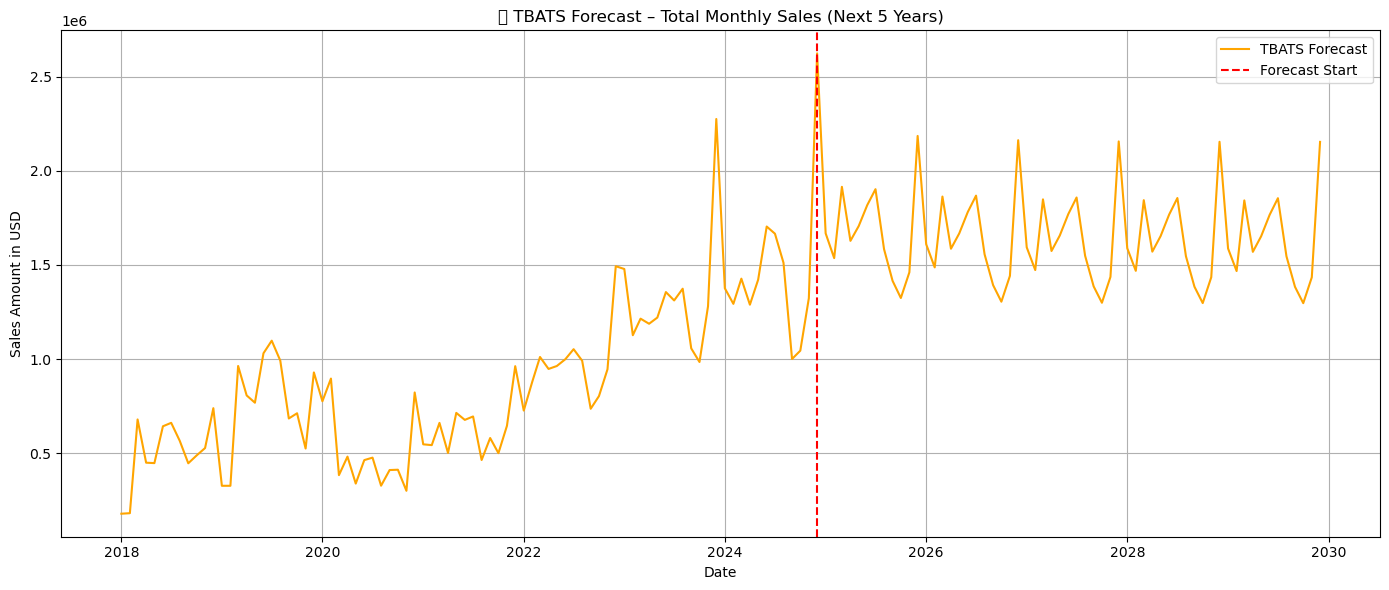

C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\2540642001.py:63: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


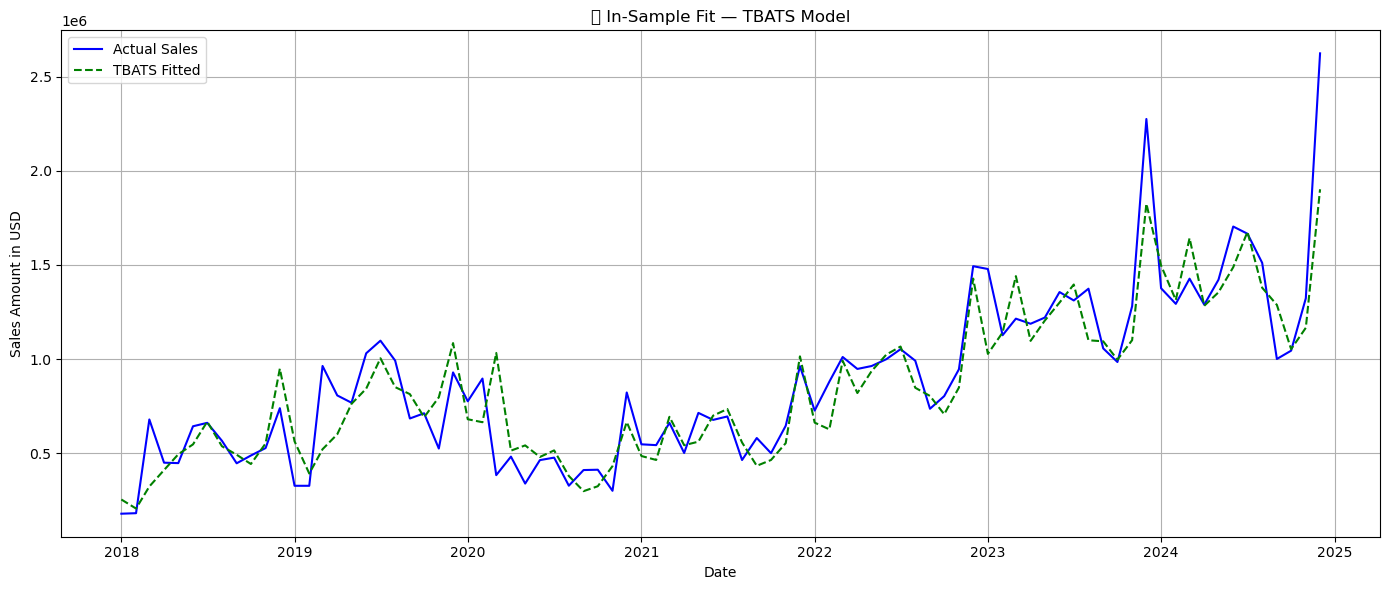

✅ Forecast saved as 'tbats_forecast.csv'


In [68]:

# === STEP 1: Prepare monthly data ===
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)
monthly_sales.set_index("Year-Month", inplace=True)

# === STEP 2: Extract sales series ===
sales_series = monthly_sales["Sale Amount in USD"].values
dates = monthly_sales.index

# === STEP 3: Fit TBATS model ===
estimator = TBATS(seasonal_periods=[12])  # Monthly seasonality
model = estimator.fit(sales_series)

# === STEP 4: Forecast 60 months ===
n_months = 60
forecast = model.forecast(steps=n_months)
forecast_index = pd.date_range(dates[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
forecast_df = pd.DataFrame({
    "Year-Month": forecast_index,
    "Forecasted Sale Amount in USD": forecast
})

# === STEP 5: In-sample prediction and RMSE ===
fitted_values = model.y_hat
insample_df = pd.DataFrame({
    "Year-Month": dates,
    "Actual": sales_series,
    "Fitted": fitted_values
})
rmse_tbats = mean_squared_error(insample_df["Actual"], insample_df["Fitted"], squared=False)
print(f"📉 In-sample RMSE for TBATS: {rmse_tbats:,.2f} USD")

# === STEP 6: Combine with full forecast ===
historical_df = insample_df.rename(columns={"Actual": "Forecasted Sale Amount in USD"})[["Year-Month", "Forecasted Sale Amount in USD"]]
TBATsforecast = pd.concat([historical_df, forecast_df], ignore_index=True)

# === STEP 7: Plot full forecast ===
plt.figure(figsize=(14, 6))
plt.plot(TBATsforecast["Year-Month"], TBATsforecast["Forecasted Sale Amount in USD"], label="TBATS Forecast", color='orange')
plt.axvline(x=dates.max(), color='red', linestyle='--', label="Forecast Start")
plt.title("📈 TBATS Forecast – Total Monthly Sales (Next 5 Years)")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === STEP 8: Plot in-sample fit ===
plt.figure(figsize=(14, 6))
plt.plot(insample_df["Year-Month"], insample_df["Actual"], label="Actual Sales", color="blue")
plt.plot(insample_df["Year-Month"], insample_df["Fitted"], label="TBATS Fitted", linestyle="--", color="green")
plt.title("📊 In-Sample Fit — TBATS Model")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === STEP 9: Export forecast ===
TBATsforecast.to_csv("tbats_forecast.csv", index=False)
print("✅ Forecast saved as 'tbats_forecast.csv'")


## One Month Model

📦 Actual sales for last known month: 2,623,077.02
📈 XGBoost prediction for next month: 2,034,179.62
🌲 Random Forest prediction for next month: 1,901,266.82


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\1787402887.py:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


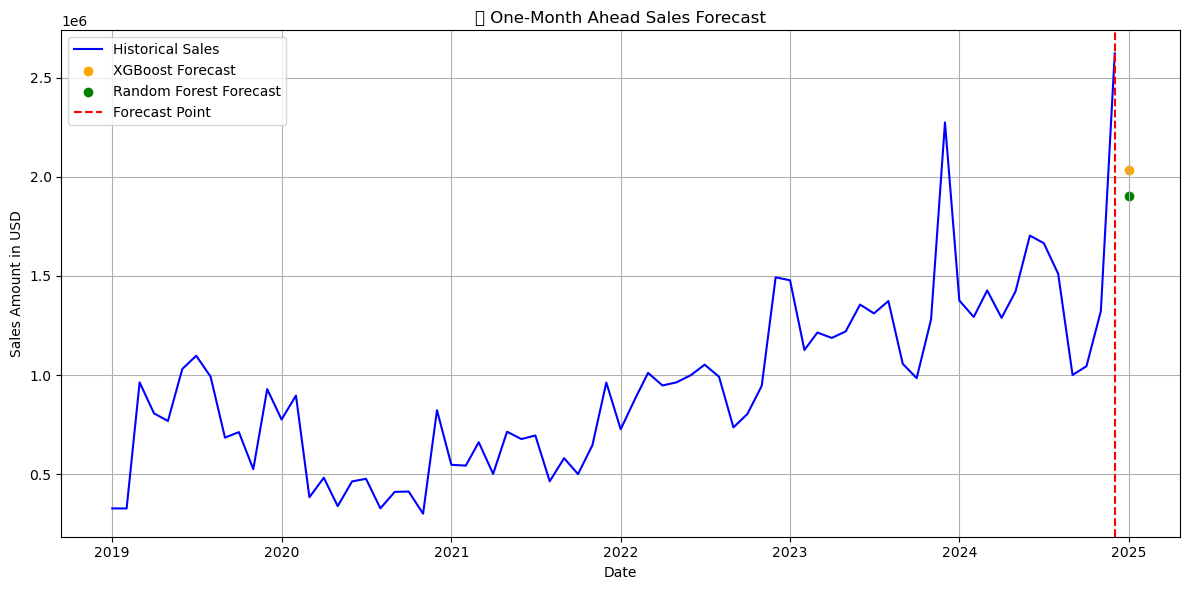

In [69]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# STEP 1: Aggregate Monthly Sales
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .asfreq("MS")
    .fillna(0)
    .reset_index()
    .rename(columns={"Year-Month": "ds", "Sale Amount in USD": "y"})
)

# STEP 2: Create Lag Features
for lag in range(1, 13):
    monthly_sales[f"lag_{lag}"] = monthly_sales["y"].shift(lag)

monthly_sales.dropna(inplace=True)

# STEP 3: Prepare Features and Labels
X = monthly_sales[[f"lag_{i}" for i in range(1, 13)]]
y = monthly_sales["y"]

# Last row will be the prediction target
X_train, X_test = X[:-1], X[-1:]
y_train, y_test = y[:-1], y[-1:]

# STEP 4: Train Models
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=52)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=30)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# STEP 5: Display Results
print(f"📦 Actual sales for last known month: {y_test.values[0]:,.2f}")
print(f"📈 XGBoost prediction for next month: {xgb_pred[0]:,.2f}")
print(f"🌲 Random Forest prediction for next month: {rf_pred[0]:,.2f}")

# STEP 6: Plot the results
plt.figure(figsize=(12, 6))

# Plot historical sales
plt.plot(monthly_sales["ds"], monthly_sales["y"], label="Historical Sales", color="blue")

# Add XGBoost and Random Forest predictions
next_month = monthly_sales["ds"].max() + pd.DateOffset(months=1)
plt.scatter(next_month, xgb_pred[0], color="orange", label="XGBoost Forecast")
plt.scatter(next_month, rf_pred[0], color="green", label="Random Forest Forecast")

# Annotations
plt.axvline(x=monthly_sales["ds"].max(), color="red", linestyle="--", label="Forecast Point")
plt.title("📊 One-Month Ahead Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Model for one Month Prediction only

C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\3757963234.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


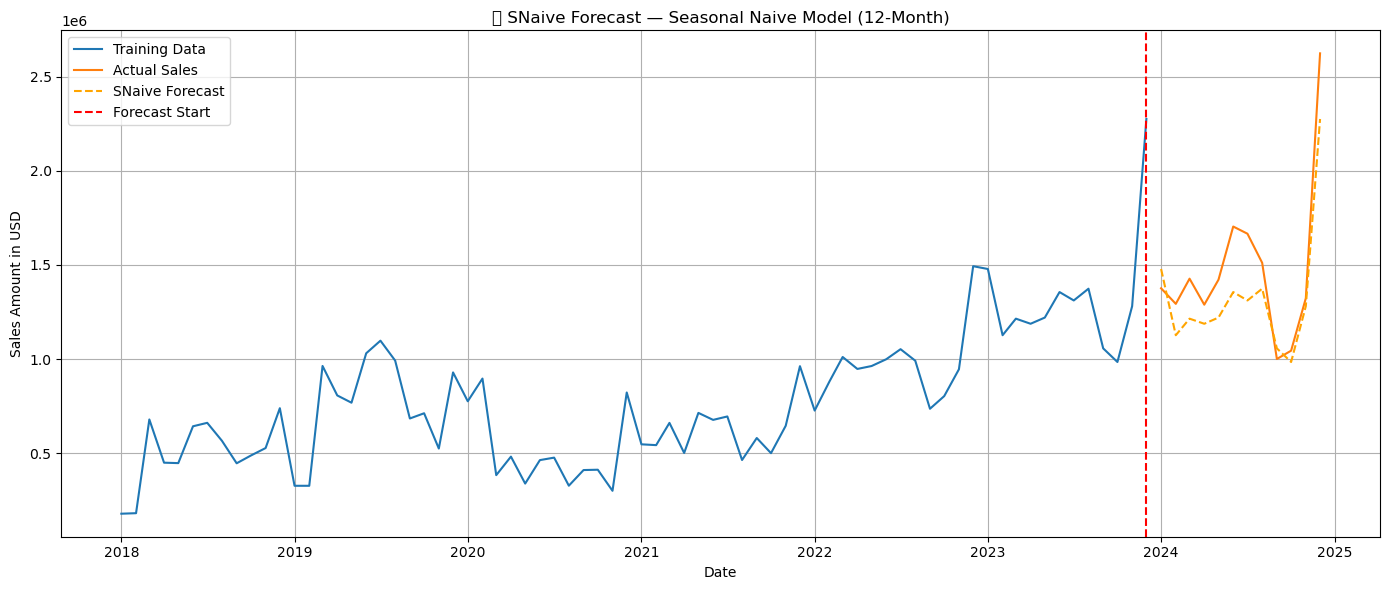

210085.3942721277

In [70]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

# Use full Clean2
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .sort_index()
    .asfreq("MS")
    .fillna(0)
)

# Split data: train on all except last 12 months
train = monthly_sales[:-12]
test = monthly_sales[-12:]

# SNaive forecast: just repeat last known value for each future month in the season
seasonal_period = 12
snaive_forecast = train[-seasonal_period:].values

# Repeat it to match the forecast horizon
snaive_forecast = np.tile(snaive_forecast, int(np.ceil(len(test)/seasonal_period)))[:len(test)]

# Evaluate forecast
rmse = mean_squared_error(test, snaive_forecast, squared=False)

# Create full forecast including past for plotting
forecast_index = test.index
snaive_series = pd.Series(snaive_forecast, index=forecast_index)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train.values, label="Training Data")
plt.plot(test.index, test.values, label="Actual Sales")
plt.plot(snaive_series.index, snaive_series.values, label="SNaive Forecast", linestyle="--", color="orange")
plt.axvline(x=train.index[-1], color='red', linestyle='--', label="Forecast Start")
plt.title("📊 SNaive Forecast — Seasonal Naive Model (12-Month)")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

rmse


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\1765739311.py:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


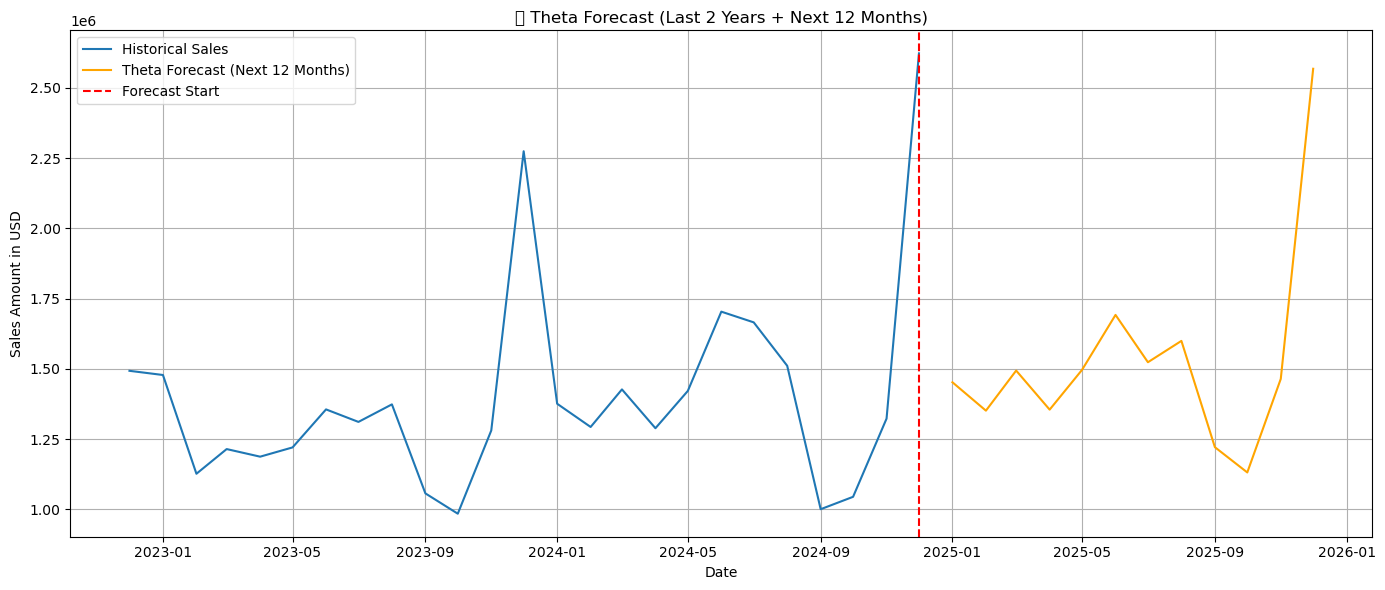

,unique_id,ds,Theta
7,total_sales,2025-08-01,1.599525e+06
8,total_sales,2025-09-01,1.221091e+06
9,total_sales,2025-10-01,1.131184e+06
10,total_sales,2025-11-01,1.464167e+06
11,total_sales,2025-12-01,2.568228e+06


In [71]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Prepare last 2 years of data
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
recent_data = Clean2[Clean2["Year-Month"] >= Clean2["Year-Month"].max() - pd.DateOffset(years=2)]

# Aggregate monthly sales
monthly_sales = (
    recent_data.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)

# Format for StatsForecast
df_theta = monthly_sales.copy()
df_theta.columns = ['ds', 'y']
df_theta['unique_id'] = 'total_sales'
df_theta = df_theta[['unique_id', 'ds', 'y']]

# Forecast setup
sf = StatsForecast(
    models=[Theta(season_length=12)],
    freq='MS',
    n_jobs=1
)

# Forecast next 12 months
forecast = sf.forecast(df=df_theta, h=12)

# Merge for comparison (no real test split since using last 2 years)
forecast_df = forecast.merge(df_theta, on='ds', how='outer')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_theta['ds'], df_theta['y'], label='Historical Sales')
plt.plot(forecast['ds'], forecast['Theta'], label='Theta Forecast (Next 12 Months)', color='orange')
plt.axvline(x=df_theta['ds'].max(), color='red', linestyle='--', label='Forecast Start')
plt.title("📈 Theta Forecast (Last 2 Years + Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

forecast.tail()


## Optimizing TBATS

🔍 Running TBATS grid search...
Params: {'use_arma_errors': True, 'seasonal_periods': [12], 'use_trend': True, 'use_damped_trend': True} → RMSE: 183,363.50
Params: {'use_arma_errors': True, 'seasonal_periods': [12], 'use_trend': True, 'use_damped_trend': False} → RMSE: 184,248.44


C:\Users\RolaJeaid(BCH)\AppData\Roaming\Python\Python311\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: When use_damped_trend can be used only with use_trend. Setting damped trend to False.
  warnings.warn(message, warning_type)


Params: {'use_arma_errors': True, 'seasonal_periods': [12], 'use_trend': False, 'use_damped_trend': True} → RMSE: 189,723.77
Params: {'use_arma_errors': True, 'seasonal_periods': [12], 'use_trend': False, 'use_damped_trend': False} → RMSE: 189,723.77
Params: {'use_arma_errors': True, 'seasonal_periods': [24], 'use_trend': True, 'use_damped_trend': True} → RMSE: 173,790.89
Params: {'use_arma_errors': True, 'seasonal_periods': [24], 'use_trend': True, 'use_damped_trend': False} → RMSE: 188,077.74


C:\Users\RolaJeaid(BCH)\AppData\Roaming\Python\Python311\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: When use_damped_trend can be used only with use_trend. Setting damped trend to False.
  warnings.warn(message, warning_type)


Params: {'use_arma_errors': True, 'seasonal_periods': [24], 'use_trend': False, 'use_damped_trend': True} → RMSE: 186,592.32
Params: {'use_arma_errors': True, 'seasonal_periods': [24], 'use_trend': False, 'use_damped_trend': False} → RMSE: 186,592.32
Params: {'use_arma_errors': True, 'seasonal_periods': [36], 'use_trend': True, 'use_damped_trend': True} → RMSE: 177,942.57
Params: {'use_arma_errors': True, 'seasonal_periods': [36], 'use_trend': True, 'use_damped_trend': False} → RMSE: 182,780.91


C:\Users\RolaJeaid(BCH)\AppData\Roaming\Python\Python311\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: When use_damped_trend can be used only with use_trend. Setting damped trend to False.
  warnings.warn(message, warning_type)


Params: {'use_arma_errors': True, 'seasonal_periods': [36], 'use_trend': False, 'use_damped_trend': True} → RMSE: 152,434.31
Params: {'use_arma_errors': True, 'seasonal_periods': [36], 'use_trend': False, 'use_damped_trend': False} → RMSE: 152,434.31
Params: {'use_arma_errors': False, 'seasonal_periods': [12], 'use_trend': True, 'use_damped_trend': True} → RMSE: 183,363.50
Params: {'use_arma_errors': False, 'seasonal_periods': [12], 'use_trend': True, 'use_damped_trend': False} → RMSE: 184,248.44


C:\Users\RolaJeaid(BCH)\AppData\Roaming\Python\Python311\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: When use_damped_trend can be used only with use_trend. Setting damped trend to False.
  warnings.warn(message, warning_type)


Params: {'use_arma_errors': False, 'seasonal_periods': [12], 'use_trend': False, 'use_damped_trend': True} → RMSE: 189,723.77
Params: {'use_arma_errors': False, 'seasonal_periods': [12], 'use_trend': False, 'use_damped_trend': False} → RMSE: 189,723.77
Params: {'use_arma_errors': False, 'seasonal_periods': [24], 'use_trend': True, 'use_damped_trend': True} → RMSE: 173,790.89
Params: {'use_arma_errors': False, 'seasonal_periods': [24], 'use_trend': True, 'use_damped_trend': False} → RMSE: 188,077.74


C:\Users\RolaJeaid(BCH)\AppData\Roaming\Python\Python311\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: When use_damped_trend can be used only with use_trend. Setting damped trend to False.
  warnings.warn(message, warning_type)


Params: {'use_arma_errors': False, 'seasonal_periods': [24], 'use_trend': False, 'use_damped_trend': True} → RMSE: 186,592.32
Params: {'use_arma_errors': False, 'seasonal_periods': [24], 'use_trend': False, 'use_damped_trend': False} → RMSE: 186,592.32
Params: {'use_arma_errors': False, 'seasonal_periods': [36], 'use_trend': True, 'use_damped_trend': True} → RMSE: 177,942.57
Params: {'use_arma_errors': False, 'seasonal_periods': [36], 'use_trend': True, 'use_damped_trend': False} → RMSE: 182,780.91


C:\Users\RolaJeaid(BCH)\AppData\Roaming\Python\Python311\site-packages\tbats\error\ExceptionHandler.py:13: InputArgsWarning: When use_damped_trend can be used only with use_trend. Setting damped trend to False.
  warnings.warn(message, warning_type)


Params: {'use_arma_errors': False, 'seasonal_periods': [36], 'use_trend': False, 'use_damped_trend': True} → RMSE: 152,434.31
Params: {'use_arma_errors': False, 'seasonal_periods': [36], 'use_trend': False, 'use_damped_trend': False} → RMSE: 152,434.31

✅ Best Params: {'use_arma_errors': True, 'seasonal_periods': [36], 'use_trend': False, 'use_damped_trend': True}
📉 Best In-Sample RMSE: 152,434.31


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\3457045674.py:77: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


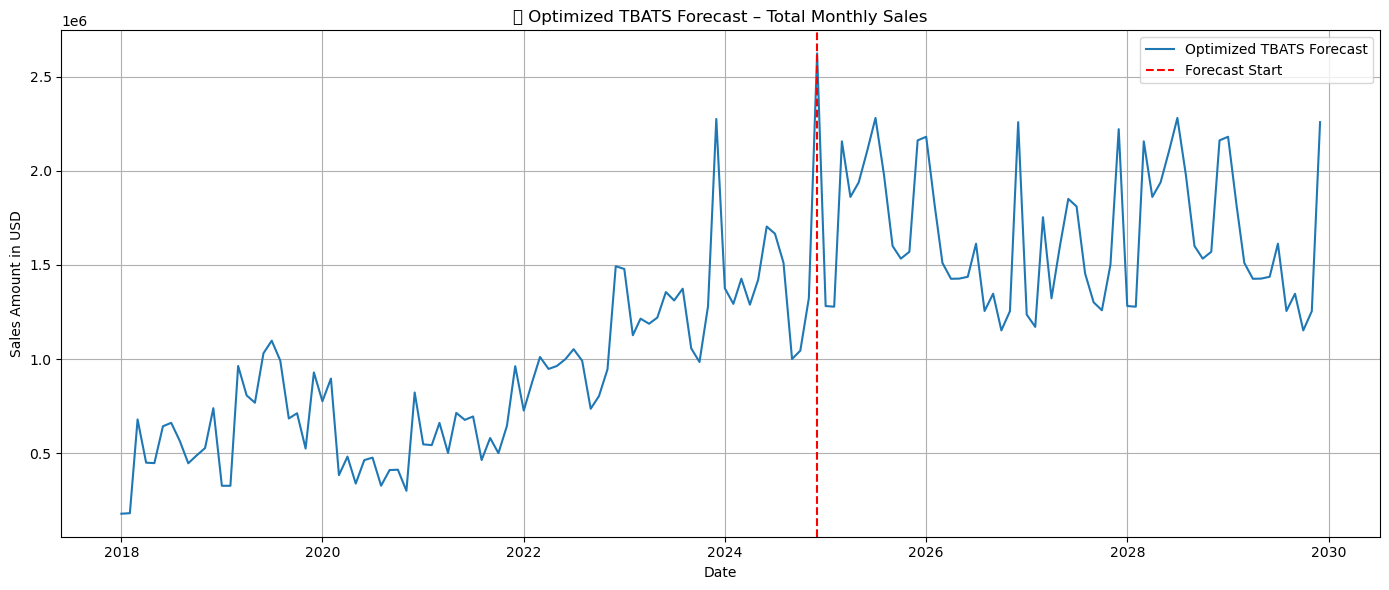

✅ Forecast saved as 'optimized_tbats_forecast.csv'


In [72]:
from tbats import TBATS
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import itertools

# === Step 1: Prepare Series ===
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])
monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .asfreq("MS")
    .fillna(0)
)
sales_series = monthly_sales.values

# === Step 2: Define parameter grid ===
param_grid = {
    'use_arma_errors': [True, False],
    'seasonal_periods': [[12], [24], [36]],
    'use_trend': [True, False],
    'use_damped_trend': [True, False]
}

all_combos = list(itertools.product(*param_grid.values()))
best_rmse = float('inf')
best_model = None
best_params = None

# === Step 3: Loop through combinations ===
print("🔍 Running TBATS grid search...")

for combo in all_combos:
    params = dict(zip(param_grid.keys(), combo))
    try:
        estimator = TBATS(**params)
        model = estimator.fit(sales_series)
        fitted_values = model.y_hat
        rmse = mean_squared_error(sales_series, fitted_values, squared=False)

        print(f"Params: {params} → RMSE: {rmse:,.2f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_params = params
    except Exception as e:
        print(f"❌ Failed for params {params}: {e}")

# === Step 4: Forecast with best model ===
print("\n✅ Best Params:", best_params)
print(f"📉 Best In-Sample RMSE: {best_rmse:,.2f}")

forecast_steps = 60
forecast = best_model.forecast(steps=forecast_steps)
forecast_index = pd.date_range(monthly_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq="MS")

# === Step 5: Build Forecast DataFrame ===
forecast_df = pd.DataFrame({
    "Year-Month": forecast_index,
    "Forecasted Sale Amount in USD": forecast
})
historical_df = monthly_sales.reset_index().rename(columns={"Sale Amount in USD": "Forecasted Sale Amount in USD"})
tbats_forecast = pd.concat([historical_df, forecast_df], ignore_index=True)

# === Step 6: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(tbats_forecast["Year-Month"], tbats_forecast["Forecasted Sale Amount in USD"], label="Optimized TBATS Forecast")
plt.axvline(x=monthly_sales.index.max(), color='red', linestyle='--', label="Forecast Start")
plt.title("📈 Optimized TBATS Forecast – Total Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Step 7: Export
tbats_forecast.to_csv("optimized_tbats_forecast.csv", index=False)
print("✅ Forecast saved as 'optimized_tbats_forecast.csv'")


## Optimized Theta Model

In [74]:
import itertools


In [80]:
print(df_theta.head())
print(df_theta.dtypes)
print(f"Total data points: {len(df_theta)}")


     unique_id         ds              y
0  total_sales 2018-01-01  178797.899749
1  total_sales 2018-02-01  181516.384112
2  total_sales 2018-03-01  679184.232772
3  total_sales 2018-04-01  449681.084818
4  total_sales 2018-05-01  447407.874587
unique_id            object
ds           datetime64[ns]
y                   float64
dtype: object
Total data points: 84


✅ Season 6 months → RMSE: 300,016.17
✅ Season 12 months → RMSE: 453,256.23
✅ Season 18 months → RMSE: 453,256.23
✅ Season 24 months → RMSE: 453,256.23

🏆 Best seasonality: 6 months → RMSE: 300,016.17


C:\Users\RolaJeaid(BCH)\AppData\Local\Temp\ipykernel_17768\3482992848.py:80: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


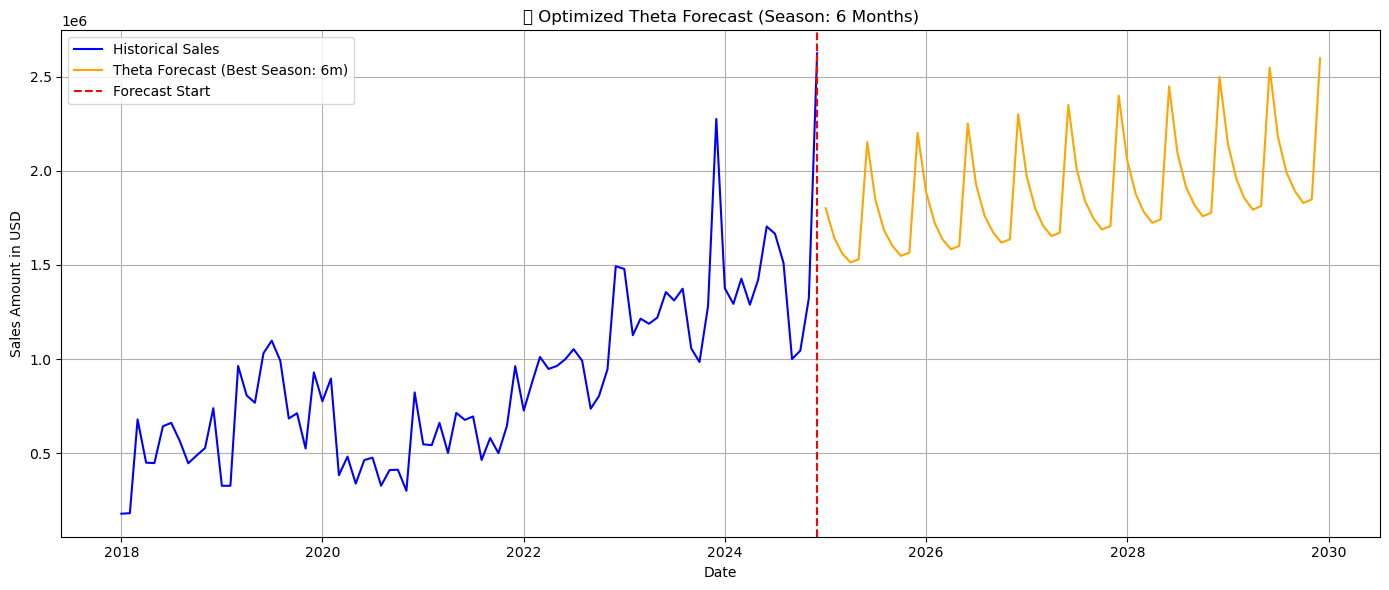

✅ Final forecast saved as 'optimized_theta_forecast.csv'


In [88]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsforecast import StatsForecast
from statsforecast.models import Theta

# === Step 1: Prepare the Data ===
Clean2["Year-Month"] = pd.to_datetime(Clean2["Year-Month"])

monthly_sales = (
    Clean2.groupby("Year-Month")["Sale Amount in USD"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)

df_theta = monthly_sales.copy()
df_theta.columns = ['ds', 'y']
df_theta['unique_id'] = 'total_sales'
df_theta = df_theta[['unique_id', 'ds', 'y']]

# === Step 2: Split into Train/Test ===
train_size = int(len(df_theta) * 0.9)  # 90% train
train_df = df_theta.iloc[:train_size]
test_df = df_theta.iloc[train_size:]

horizon = len(test_df)

# === Step 3: Grid Search over seasonality ===
seasonality_options = [6, 12, 18, 24]
results = []

for season in seasonality_options:
    try:
        sf = StatsForecast(
            models=[Theta(season_length=season)],
            freq='MS',
            n_jobs=1
        )
        forecast = sf.forecast(df=train_df, h=horizon)

        merged = pd.merge(test_df, forecast, on='ds', how='inner')

        rmse = mean_squared_error(merged['y'], merged['Theta'], squared=False)
        print(f"✅ Season {season} months → RMSE: {rmse:,.2f}")

        results.append((season, rmse))

    except Exception as e:
        print(f"❌ Failed for season {season}: {e}")

# === Step 4: Pick the Best ===
if not results:
    raise Exception("No Theta model succeeded. Please check your data.")

best_season, best_rmse = sorted(results, key=lambda x: x[1])[0]
print(f"\n🏆 Best seasonality: {best_season} months → RMSE: {best_rmse:,.2f}")

# === Step 5: Refit Best Model on Full Data and Forecast 60 Months ===
sf_final = StatsForecast(
    models=[Theta(season_length=best_season)],
    freq='MS',
    n_jobs=1
)

final_forecast = sf_final.forecast(df=df_theta, h=60)

# === Step 6: Plot
plt.figure(figsize=(14, 6))
plt.plot(df_theta['ds'], df_theta['y'], label='Historical Sales', color='blue')
plt.plot(final_forecast['ds'], final_forecast['Theta'], label=f'Theta Forecast (Best Season: {best_season}m)', color='orange')
plt.axvline(x=df_theta['ds'].max(), color='red', linestyle='--', label='Forecast Start')
plt.title(f"📈 Optimized Theta Forecast (Season: {best_season} Months)")
plt.xlabel("Date")
plt.ylabel("Sales Amount in USD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Step 7: Save
forecast_export = final_forecast[['ds', 'Theta']].rename(columns={'ds': 'Year-Month', 'Theta': 'Forecasted Sale Amount in USD'})
forecast_export.to_csv("optimized_theta_forecast.csv", index=False)
print("✅ Final forecast saved as 'optimized_theta_forecast.csv'")


## SAVING the dataset

In [89]:
# Save the cleaned dataset
output_file = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\Cleanedfile2.csv"
Clean2.to_csv(output_file, index=False)

In [90]:
final_df=pd.read_csv(r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\Cleanedfile2.csv")

In [91]:
# Save the cleaned dataset
output_file = r"C:\Users\RolaJeaid(BCH)\Desktop\MSBA\Spring 2025\Capstone\wetransfer_inventory-entry-2019-xlsx_2024-10-11_1211\csv_files\Capstonedata.csv"
final_df.to_csv(output_file, index=False)